<a href="https://colab.research.google.com/github/SANTOSH7077/BIKE-SHARING_PROJECT_2/blob/main/BIKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Seoul_Bike_31590.jpg/1200px-Seoul_Bike_31590.jpg" width="18000"  height="500">

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Import required modules and Loading our Dataset**

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount the google drive for import dataset

In [ ]:
# loding the dataset of seoul bike data from google driver
path="/content/drive/MyDrive/bikesharing/SeoulBikeData.csv"
bike_df=pd.read_csv(path,encoding ='latin')

# **Understanding Our dataset**

# **Clearing Data Process**
###The most important steps before going for the  EDA(Exploratory Data Analysis)
###As we know clearing data will remove the conflict between any duplicate data/row.



## *We have to do the above data cleaning process through the following steps:-*

###1) Missing values finding and replacing with proper values.
###2)  Adding some required new columns.
###3) Change required column data types from Object to appropriate datatypes.
###4)  Checking duplicate rows in dataset.

In [ ]:
#As column name contain space and variables having units in brackets we have to change it for better understanding
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'}, inplace=True) 

In [ ]:
#change the datatype of date columns to "date","month","year"
bike_df['Date']=bike_df['Date'].astype("datetime64[ns]")
# bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))


In [ ]:
bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day_name()


In [ ]:
#set weekend is 1 and weekdays 0
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
#check new data set
bike_df.head(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Year  Month       Day  \
0  Winter  No Holiday             Yes  2017      1  Thursday   
1  Winter  No Holiday             Yes  2017      1  Thursday   
2  Winter  No Holiday             Yes  2017      1  Thursday   
3  Winter  No Holiday             Yes  2017      1  Thursday   
4  Winter  No Holiday             Yes  2017      1  Thursday   

   Weekdays_or_weekend  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [ ]:
#Drop the Date and Day column
bike_df.drop(['Date','Day'], axis=1, inplace =True)


## ***Checking each column data value***

In [ ]:
from pandas.core.base import value_counts

In [ ]:
#Get distinct categories counts for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
#Get distinct categories counts for Seasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Get distinct categories counts for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [ ]:
#Get distinct categories counts for Weekdays_or_weekend categories
bike_df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [ ]:
#Get distinct categories counts for Month categories
bike_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [ ]:
#checking the Summary of bike dataset
bike_df.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall         Year        Month  Weekdays_or_weekend  
count  8760.000000  8760.000000  8760.000000          8760.000000  
mean      0.075068  2017.915068     6.526027             0.290411  
std       0.436746     0.278796     3.448048             0.453978  
min       0.000000  2017.000000     1.000000             0.000000  
25%       0.000000  2018.000000     4.000000             0.000000  
50%       0.000000  2018.000000     7.000000             0.000000  
75%       0.000000  2018.000000    10.000000             1.000000  
max       8.800000  2018.000000    12.000000             1.000000

In [ ]:
#checking the Null value
bike_df.isnull().sum()
# print(f"We have {duplicates} rows in our Bike Data.")

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Year                     0
Month                    0
Weekdays_or_weekend      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

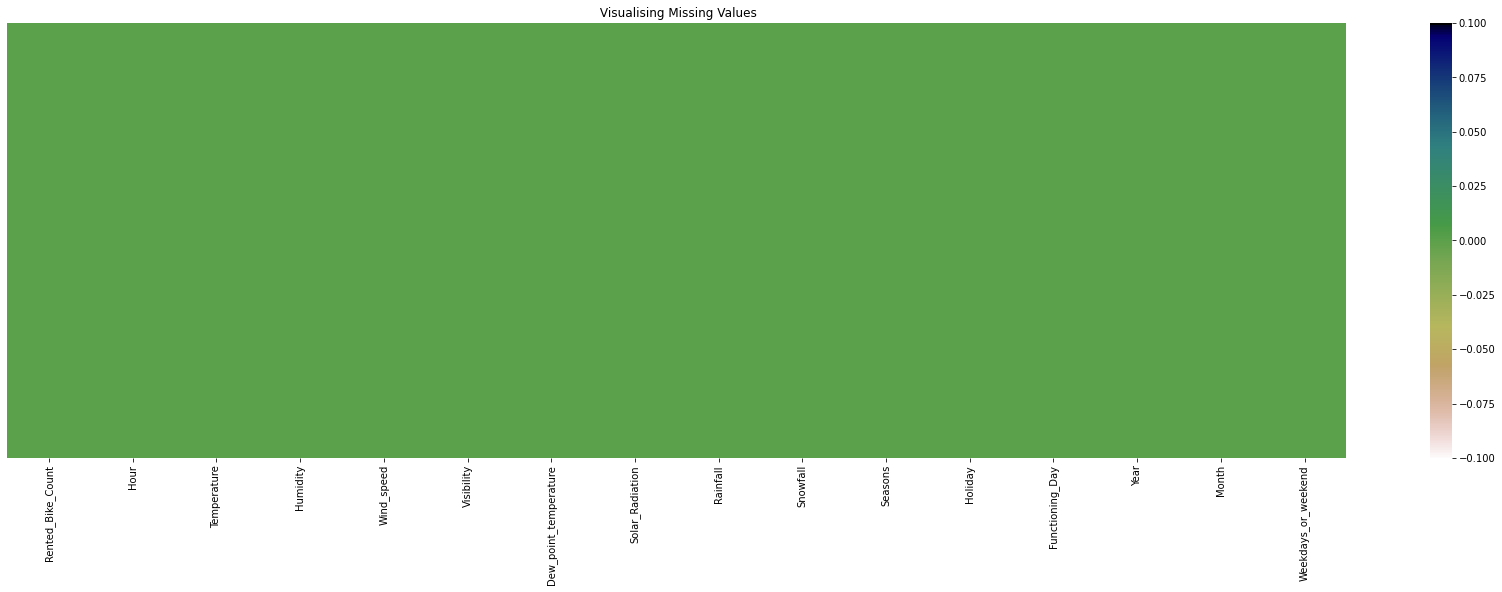

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(30,8))
sns.heatmap(bike_df.isnull(),cmap='gist_earth_r',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## There is No Null values in the Dataset.

# **Duplicate value checking**

In [ ]:
#checkimg Duplicate rows in BikeData.

duplicates=bike_df.duplicated().sum()
print(f"We have {duplicates} rows in our Bike Data.")

# No duplicate rows found

We have 0 rows in our Bike Data.


# **Performing** Exploratory Data Analysis------>EDA

**Why do we perform EDA?**

* An EDA is a thorough examination meant to uncover the 
underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

# **Univariate Analysis**

**Why do you do univariate analysis?**
* The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* A dependent variable is a variable whose value will change depending on the value of another variable. In analysis we do work around this variable.In simple word they are depends upon other value.

# **Analysis of Independent variable wrt Dependent variable**


***1.Numerical variables***

**2.Categorical variables** 


# **Numerical variables**

**What is a Numerical variables in data analysis?**
* A numeric variable (also called quantitative variable) is a quantifiable characteristic whose values are numbers.

**Types Numerical variables in data analysis?**
* Numeric variables may be either continuous or discrete.

**What is a Continuous Numerical variables in data analysis?**
* A variable is said to be continuous if it can assume an infinite number of real values within a given interval.

* **Ex-**Weight 56.53Kg..Height 1.61cm

**What is a Discrete Numerical variables in data analysis?**
* As opposed to a continuous variable, a discrete variable can assume only a finite number of real values within a given interval.

* **Ex-**Class 5th, Number of student 20


##**Analyze of Numerical variables**

In [ ]:
#assign the numerical coulmn to variavle
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year', 'Month', 'Weekdays_or_weekend'],
      dtype='object')

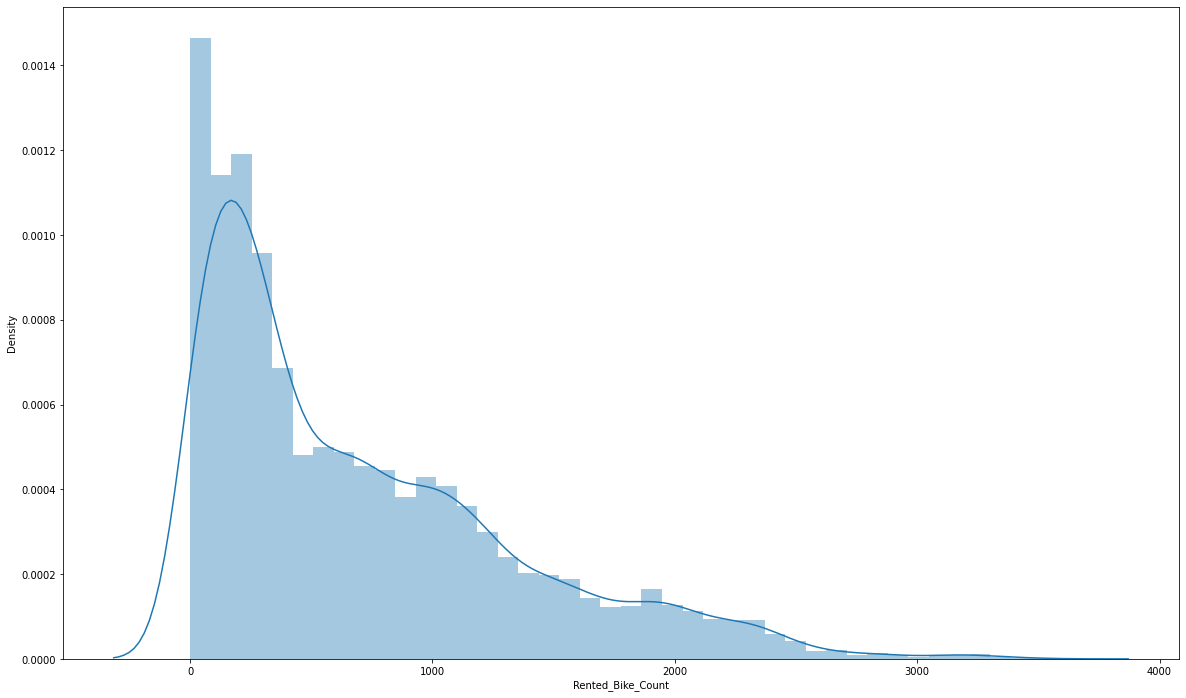

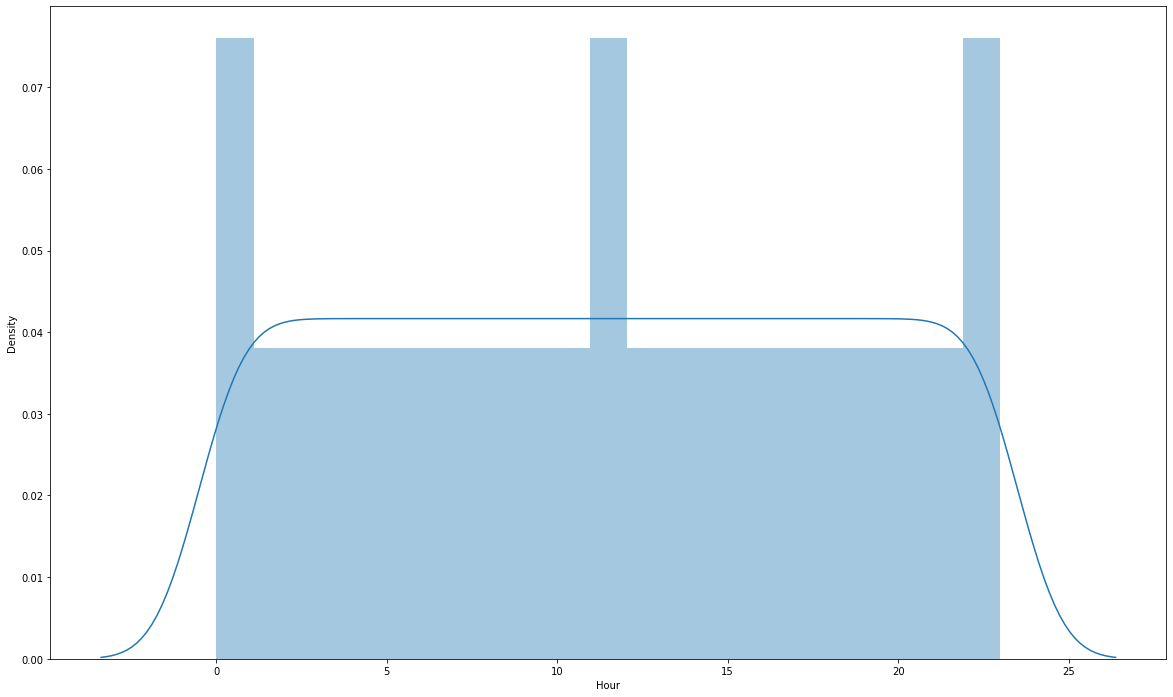

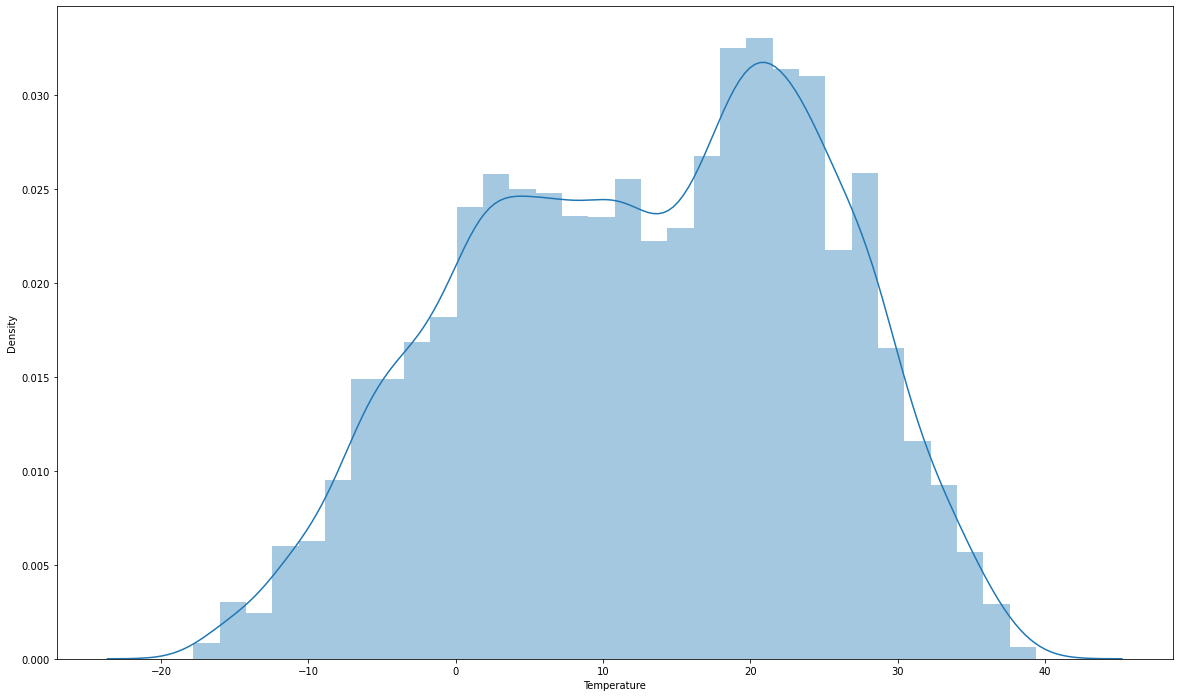

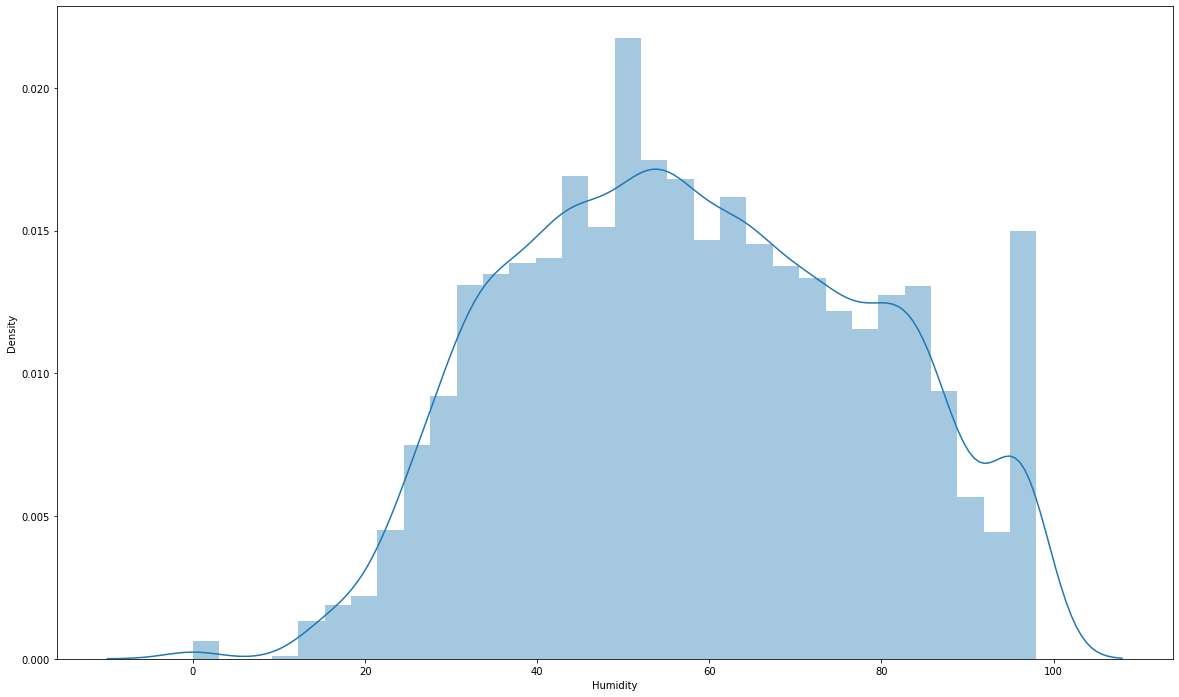

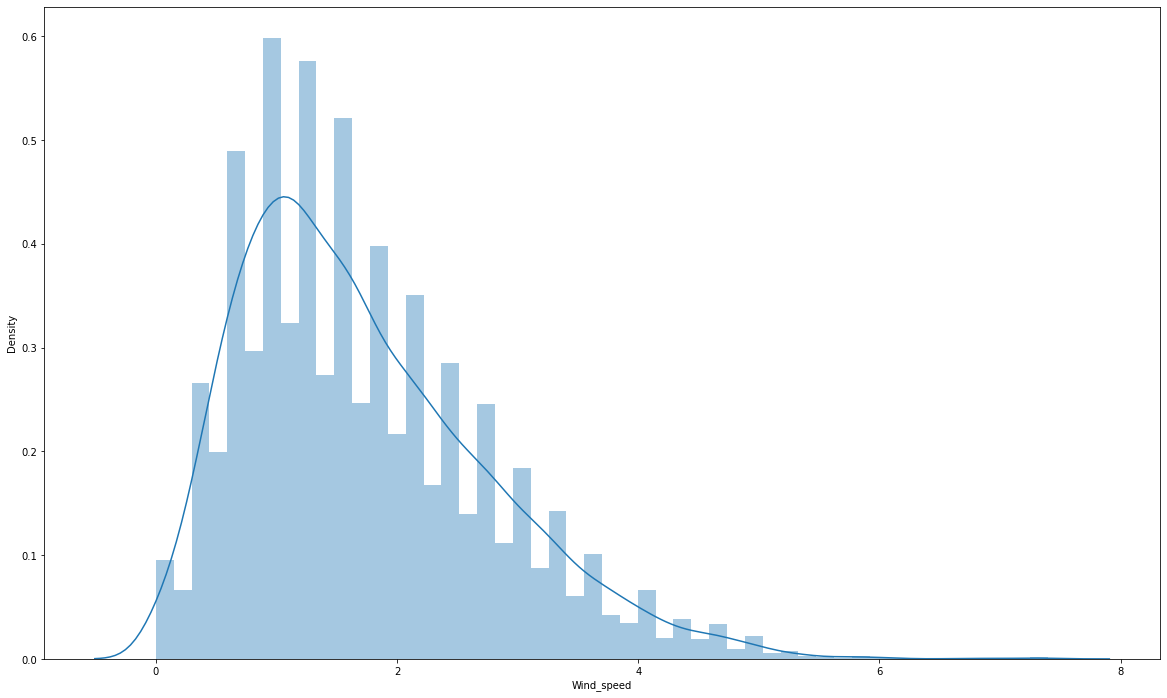

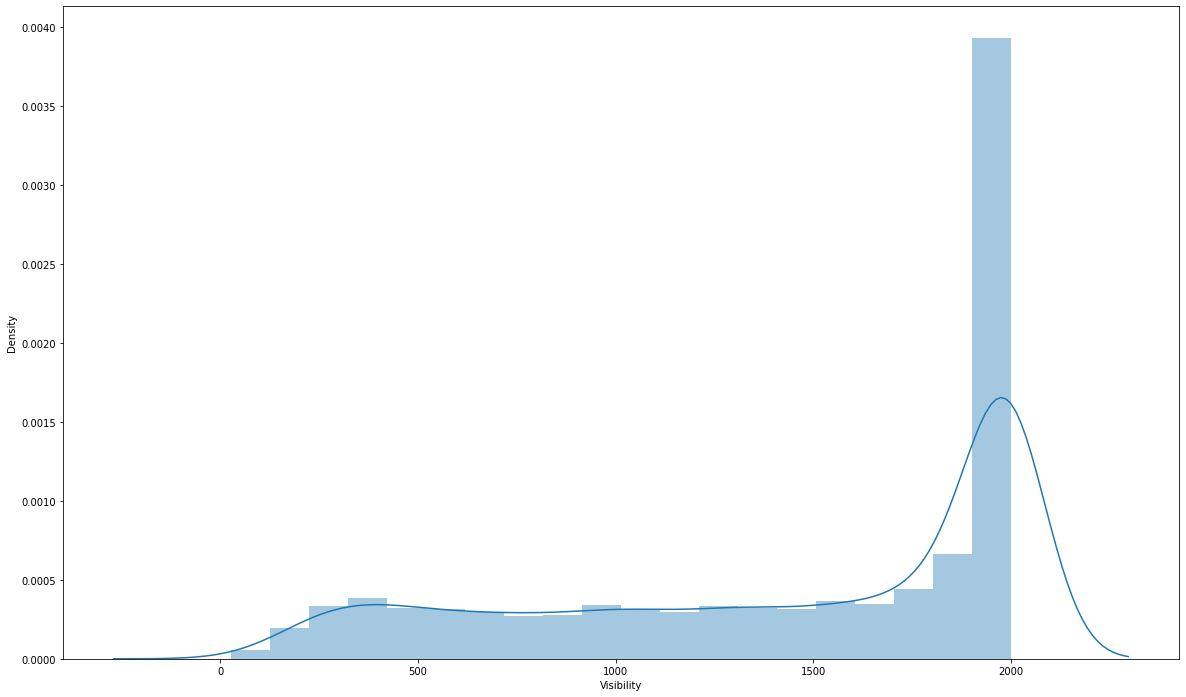

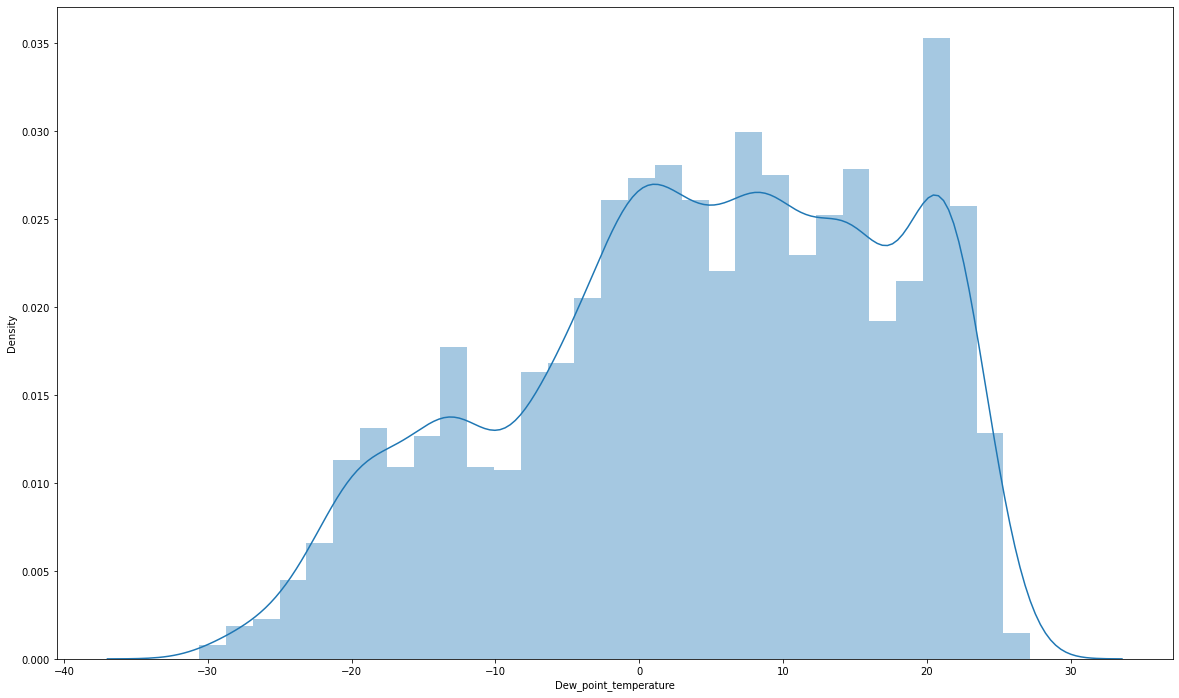

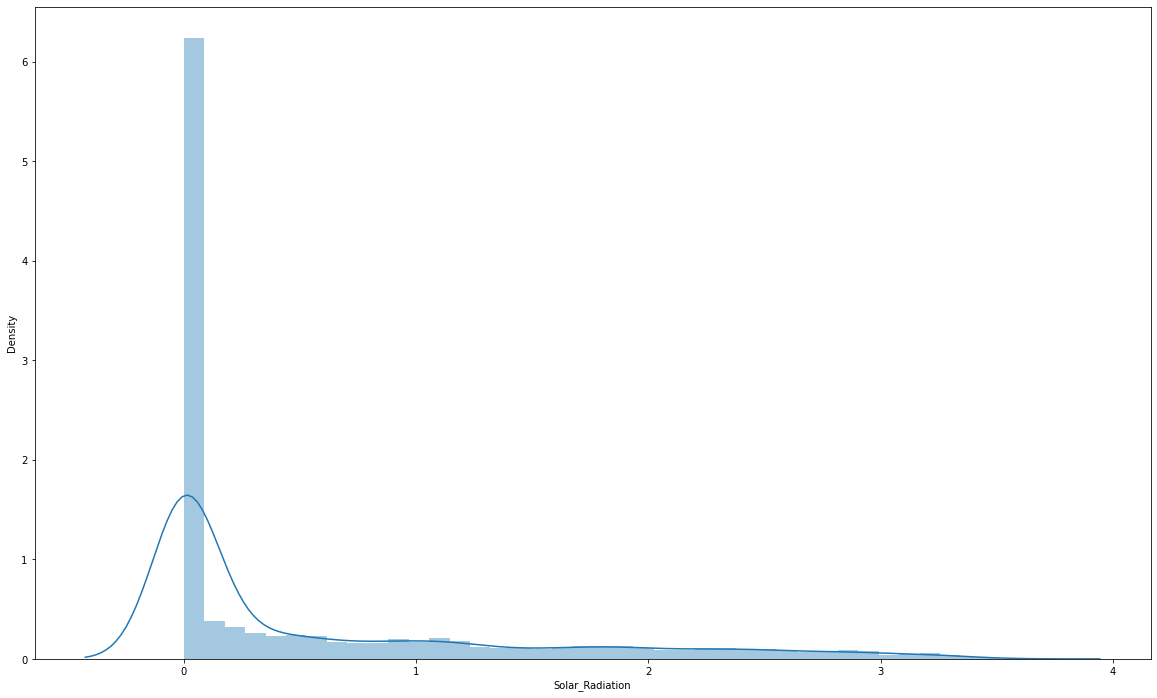

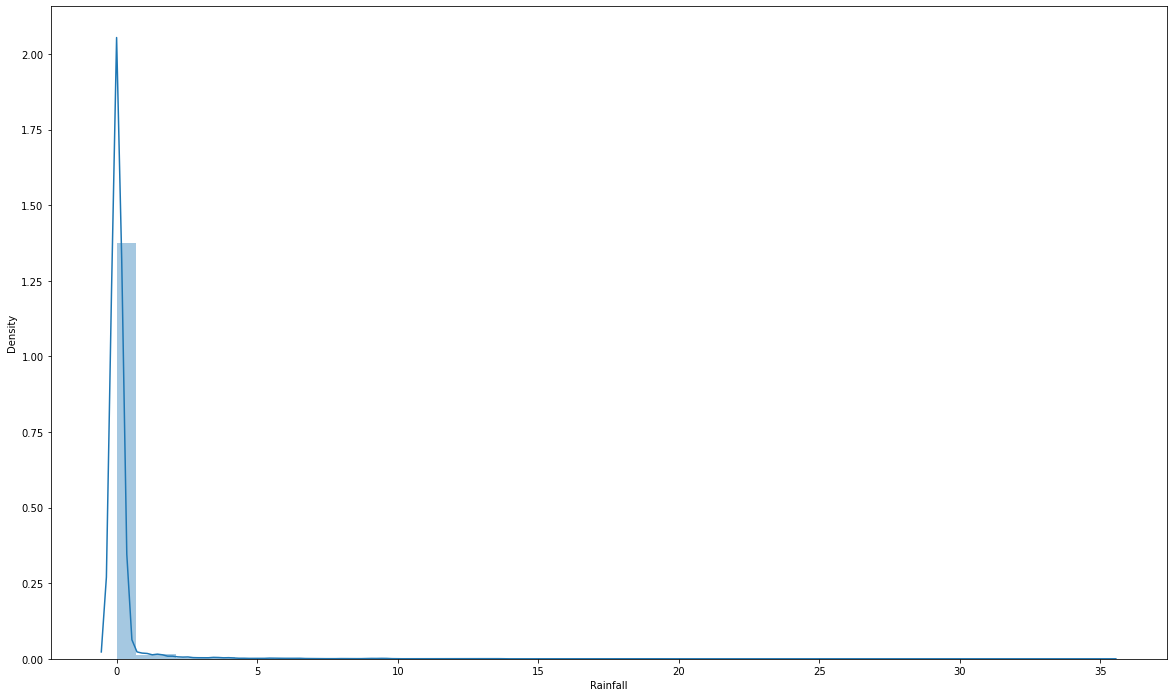

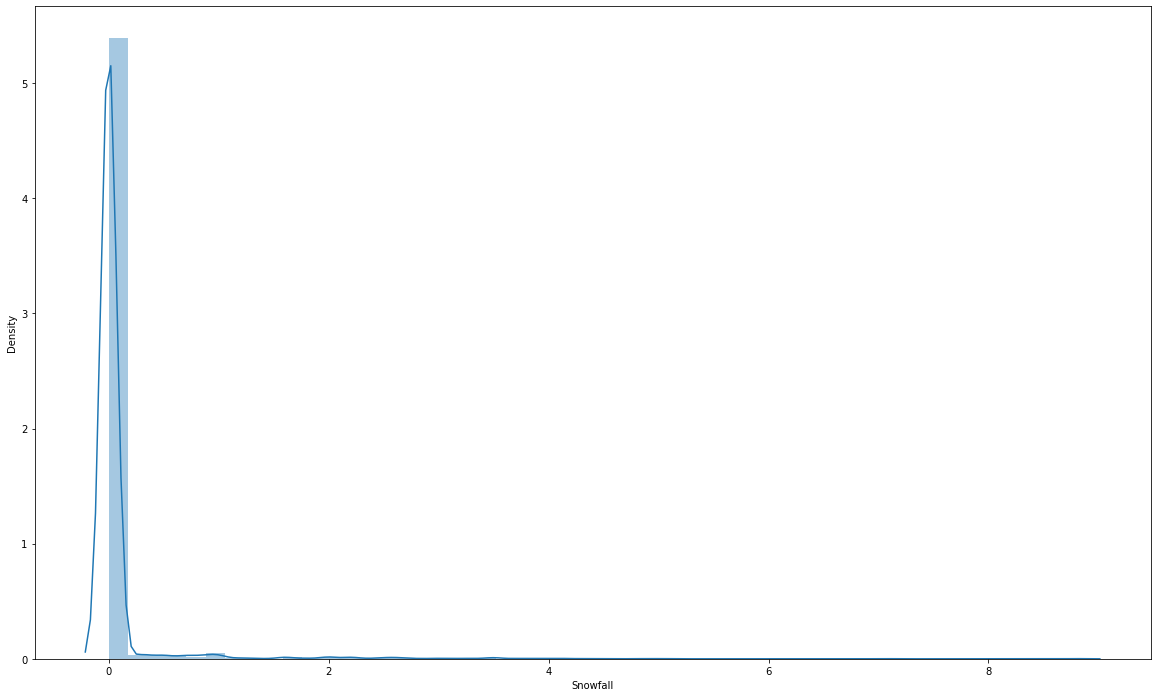

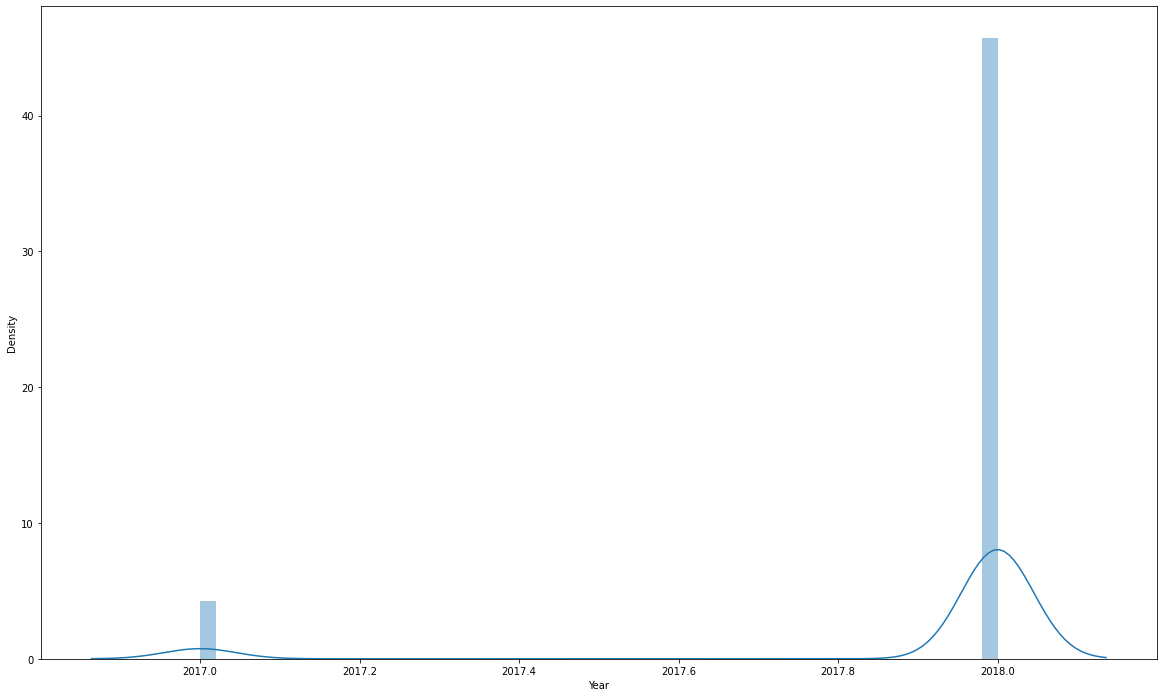

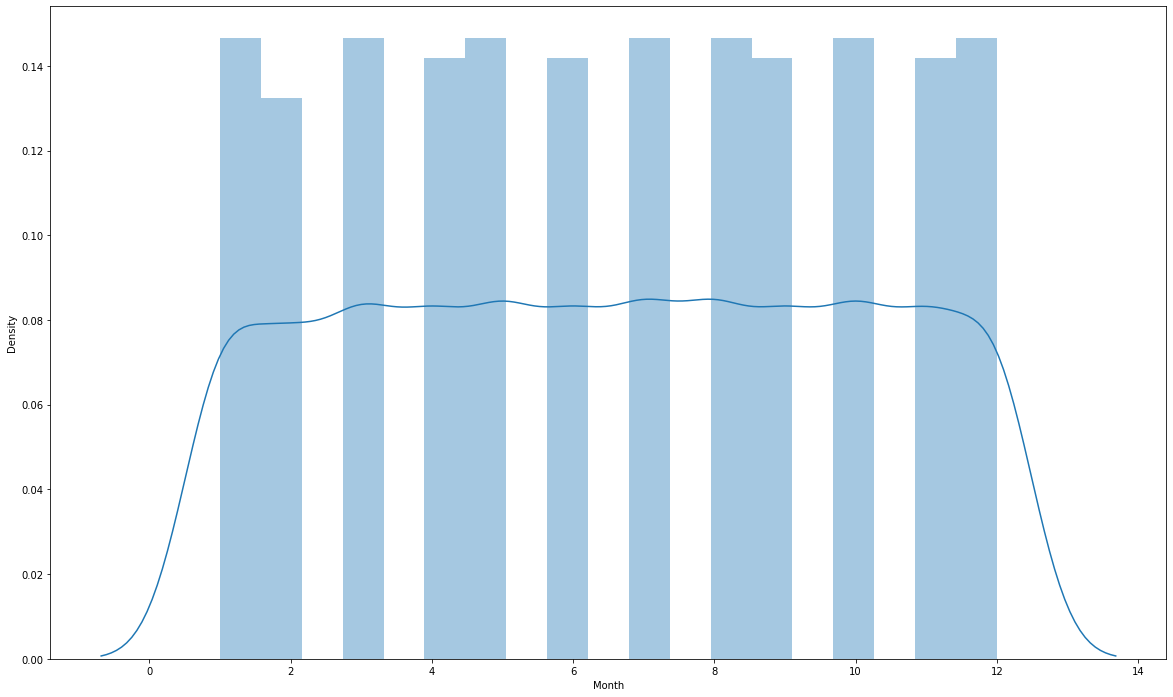

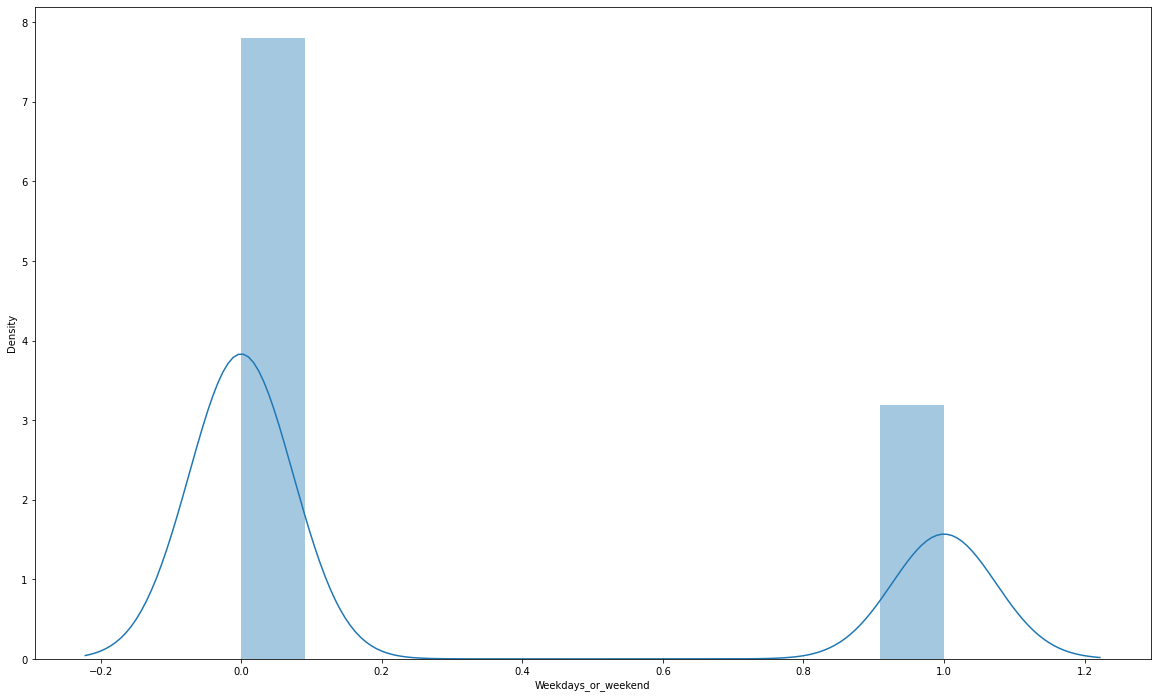

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(20,12))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

## **Numerical vs Rented_Bike_count**

  ## Relationship between "Rented_Bike_Count" and "Temperature" 

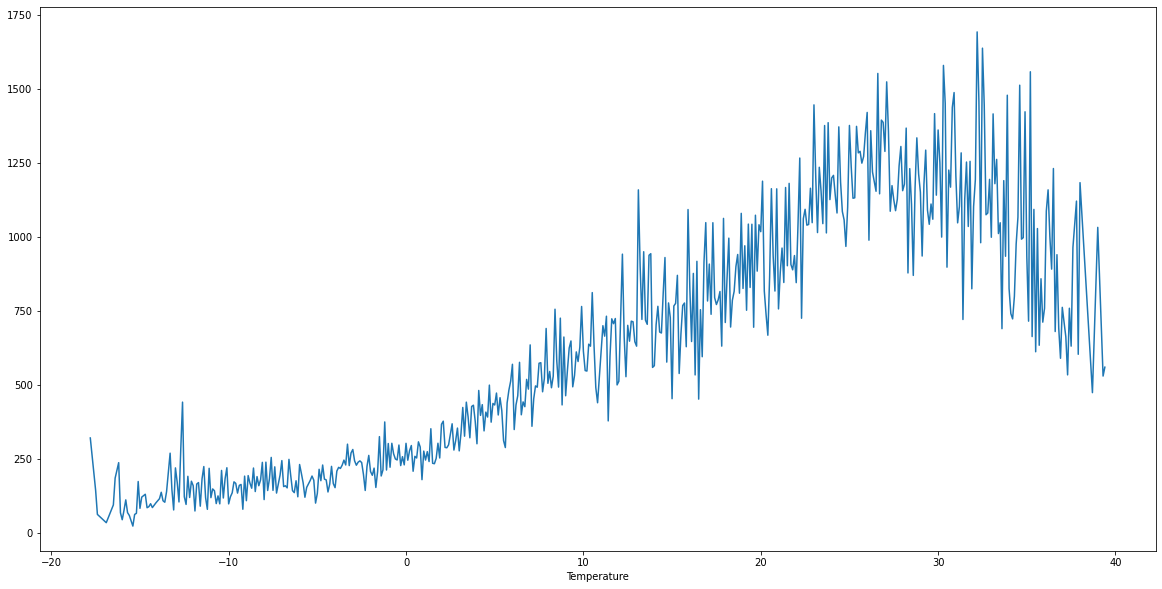

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
plt.figure(figsize=(20,10))
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

*   ### **In above plot the demand of rented bike is highest when temperature is around 20°C-32°C.** 

# **Relationship between "Rented_Bike_Count" and "Dew_point_temperature"**

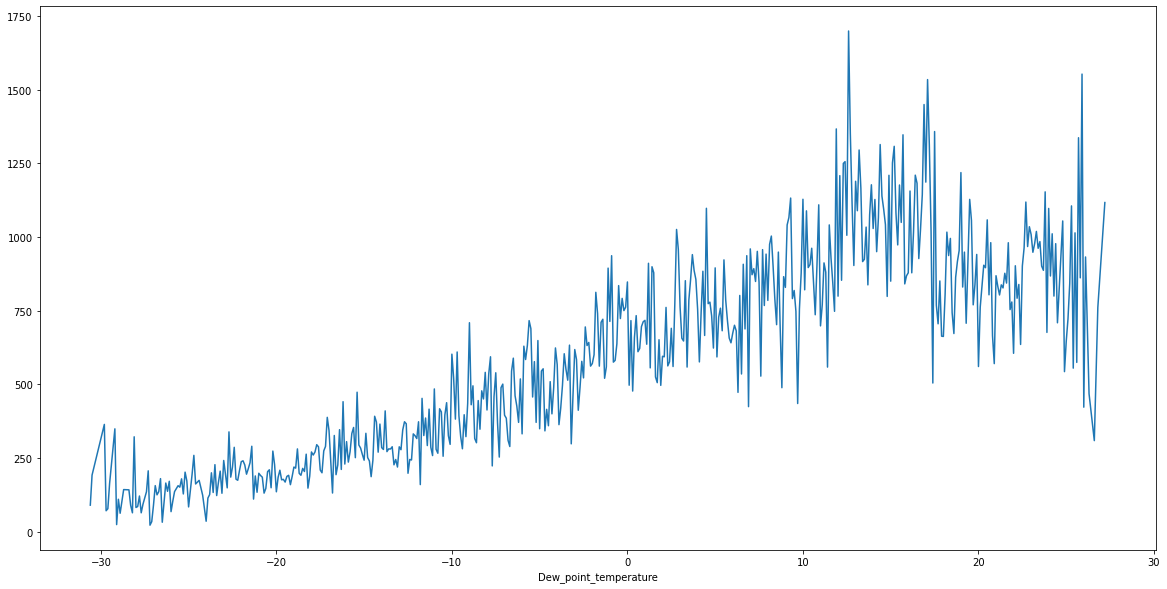

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
plt.figure(figsize=(20,10))
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()
plt.show()

# **Relationship between "Rented_Bike_Count" and "Solar_Radiation"**

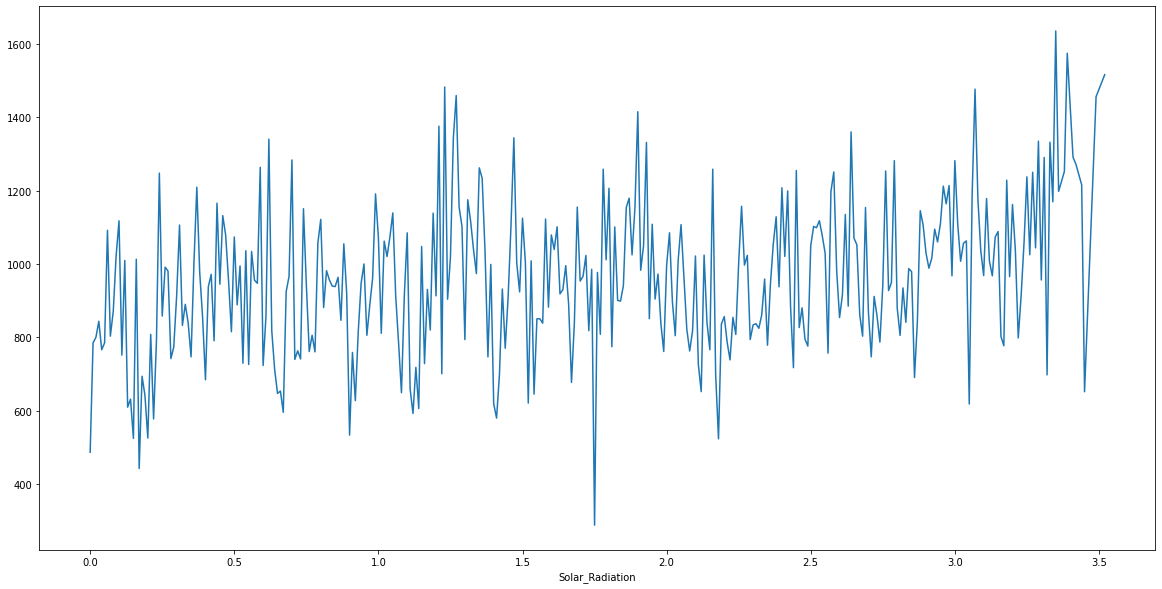

In [ ]:
plt.figure(figsize=(20,10))
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()
plt.show()

In this plot the demand of rented bike is high if there is solar radiation.Mostly the number is around 1000(+/-200)

## Relationship between "Rented_Bike_Count" and "Snowfall"

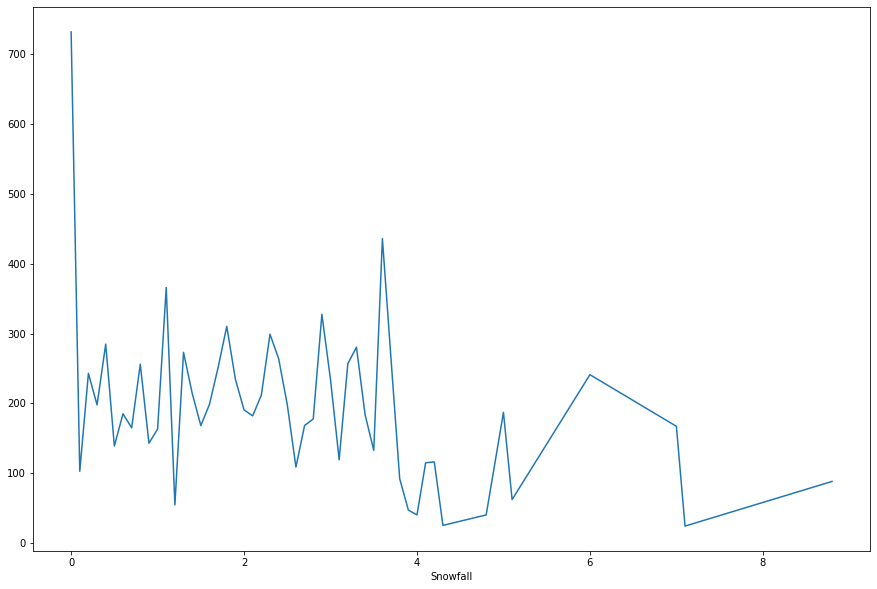

In [ ]:
plt.figure(figsize=(15,10))
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()
plt.show()

***In this plot the demand of rented bike is drastically change when snowfall is increase.***

# **Relationship between "Rented_Bike_Count" and "Rainfall"**

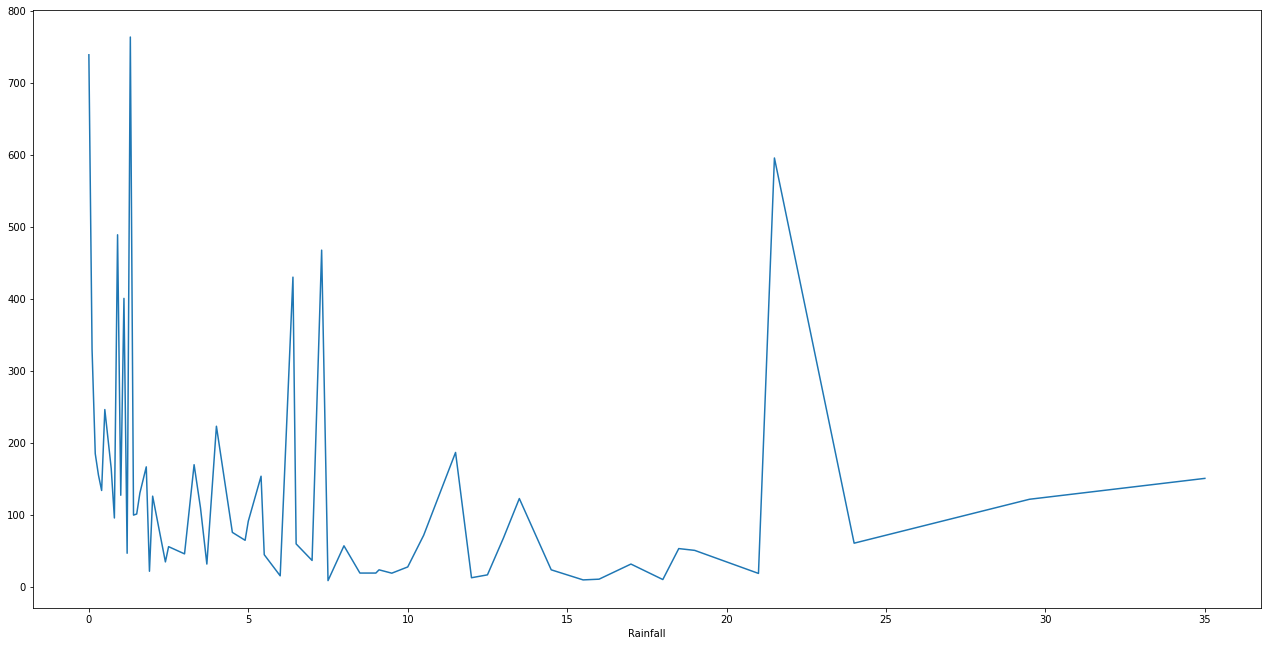

In [ ]:
plt.figure(figsize=(22,11))
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()
plt.show()

# **Categorical variables**

**What is a categorical variables in data analysis?**
* A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.
*Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type.

1. Rented bike vs Month

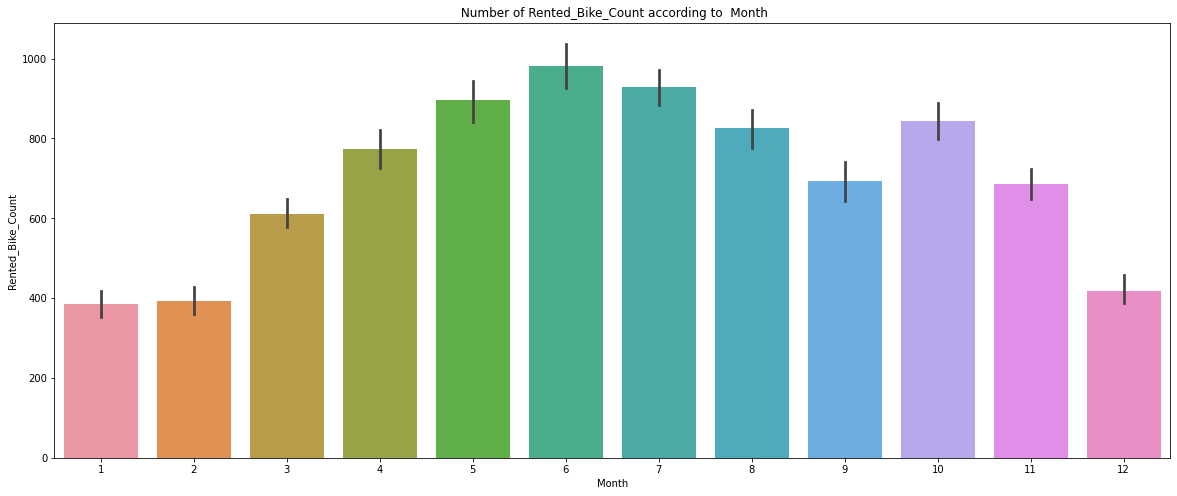

In [ ]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Month barplot
sns.barplot(data = bike_df,x = 'Month',y = 'Rented_Bike_Count',)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

***From the above bar plot is clearly showing that from jan to jun demand for the rented bike is growing high and then slowly the demand start droping till Sep and than again a small demand increase for some a month and then it decrease.***

## **2.Rented bikes according to weekdays and weekend**

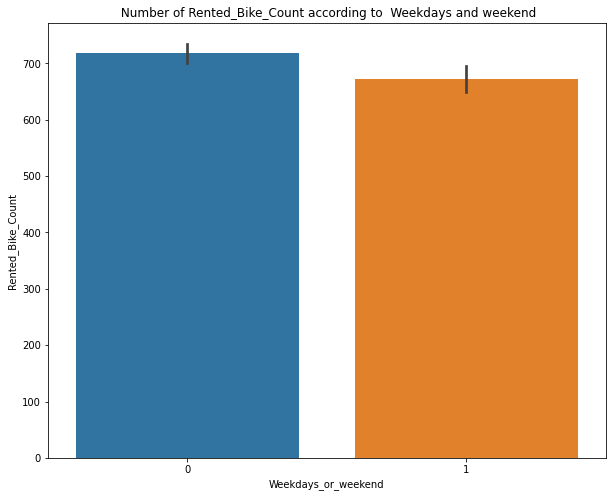

In [ ]:
# Give a size 
fig,ax=plt.subplots(figsize=(10,8))

# Rented_Bike_Count v/s Weekdays_or_weekend barplot
sns.barplot(data = bike_df,x = 'Weekdays_or_weekend',y = 'Rented_Bike_Count',)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Weekdays and weekend')
plt.show()

## **3.Rented bikes demand wrt hour on weekdays and weekends** 

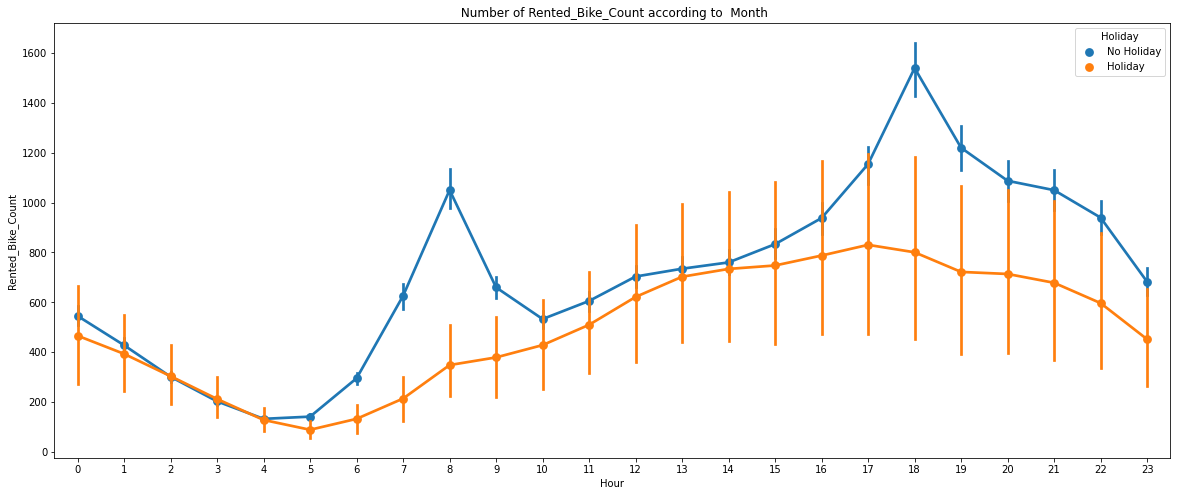

In [ ]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Holiday and No-Holiday barplot in hourly
sns.pointplot(data = bike_df,x = 'Hour',y = 'Rented_Bike_Count',hue='Holiday',ax=ax)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

*  ### From this pointplot graph we can see that on holiday ranted bike demand is less as compaired to No-holiday.Between 7am-9am and 5pm-7pm demand of rented bike is high  

## **4.Rented bikes demand wrt Functioning Day** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

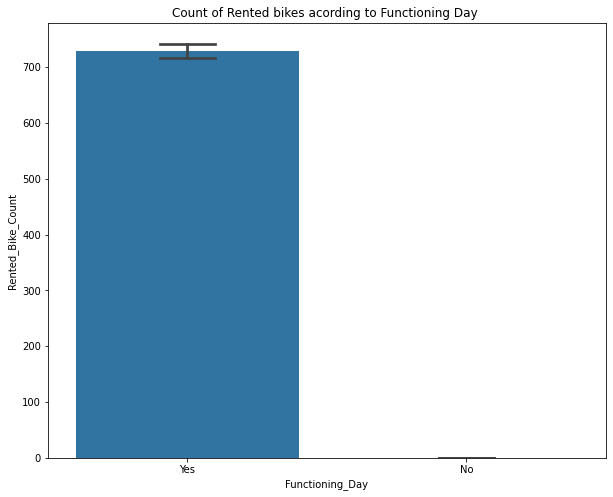

In [ ]:
#anlysis of data by vizualisation on function day
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

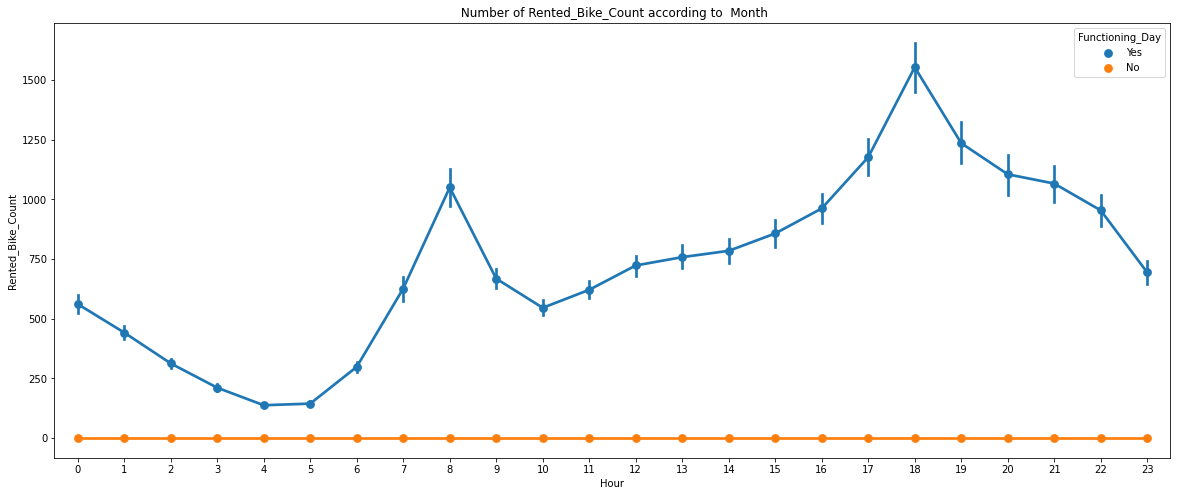

In [ ]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Functioning_Day barplot in hourly
sns.pointplot(data = bike_df,x = 'Hour',y = 'Rented_Bike_Count',hue='Functioning_Day',ax=ax)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

*  ### In the above bar plot and point plot which shows the use of rented bike in functioning days or not, and it clearly shows that,Peoples dont use reneted bikes in no functioning day.

## **5.Rented bikes demand wrt Season** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

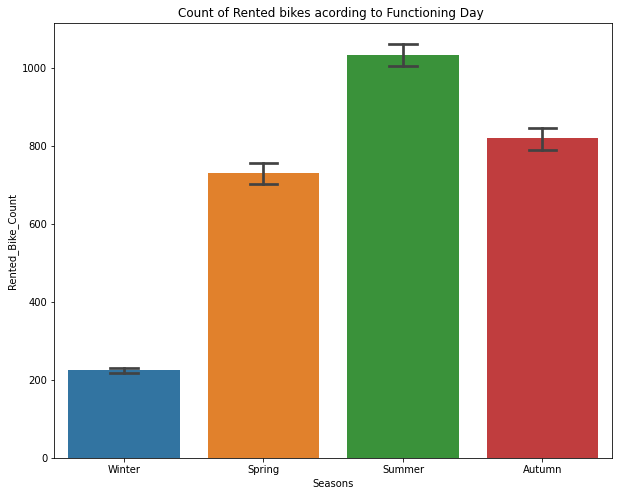

In [ ]:
#anlysis of data by vizualisation on season
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

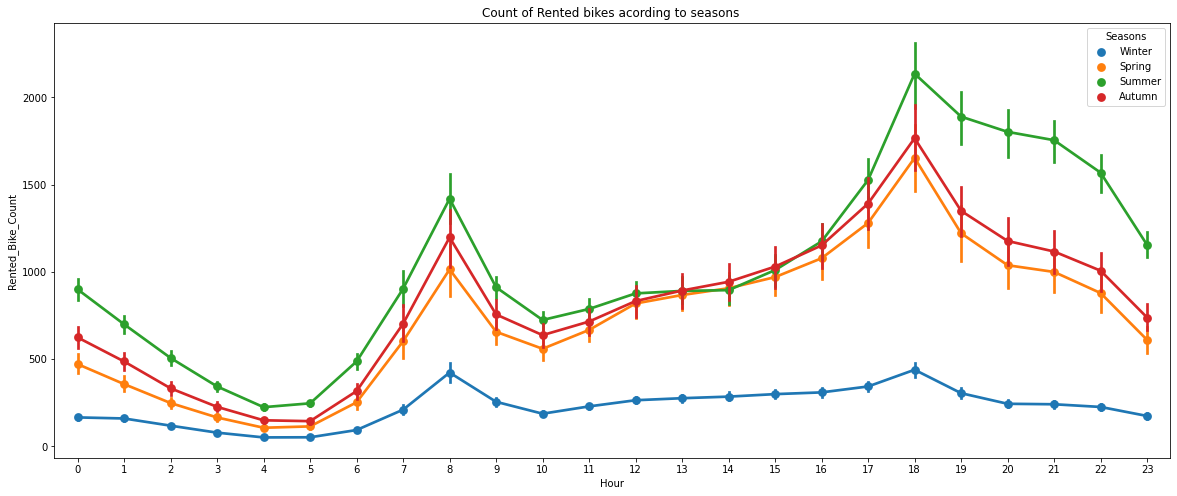

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

*   ###    Form the bar chart and pointplot we can clearly say that in Summer demand is high as compaired to other season and in winter the demand is lowest.

*   ###    Point chart also tell that in morning from 7-9am and 5-7pm demand is high in every season


## **6.Rented bikes demand wrt hour,**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

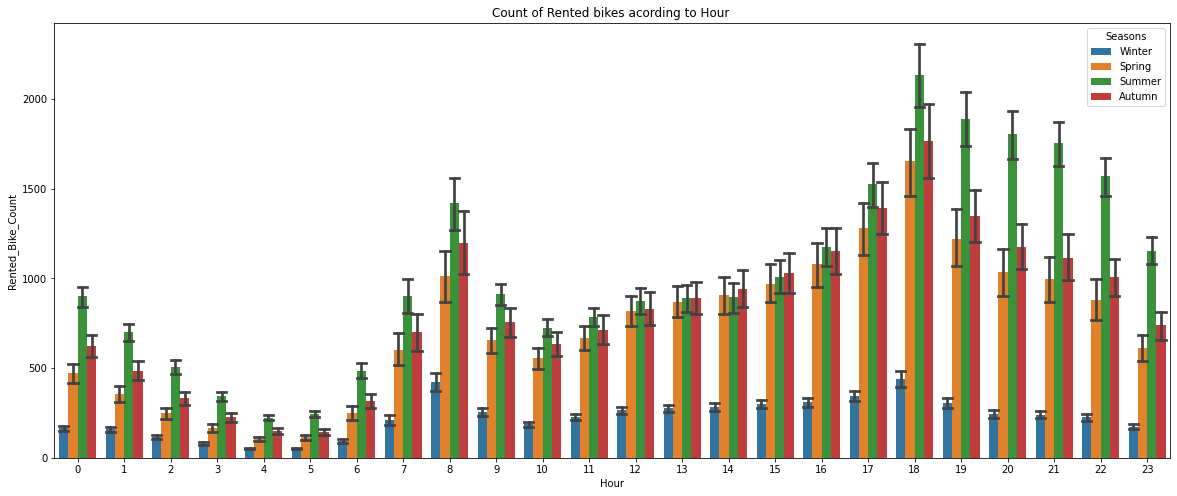

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',capsize=.2, hue='Seasons')
ax.set(title='Count of Rented bikes acording to Hour ')


*   ### In this barchart the demand of bike is at 8am am and at 6pm is highest.

# **Regression plot**


##    **1. It is a plot give a visual guide that helps to emphasize patterns in a dataset between two parameter.**
##   **2. Regression lines can be used as a way of visually  the liner relationship between the Independent (x)----->Numerical variables and Dependent variables(y)----->Rented_Bike_Count variables here in the graphs.**

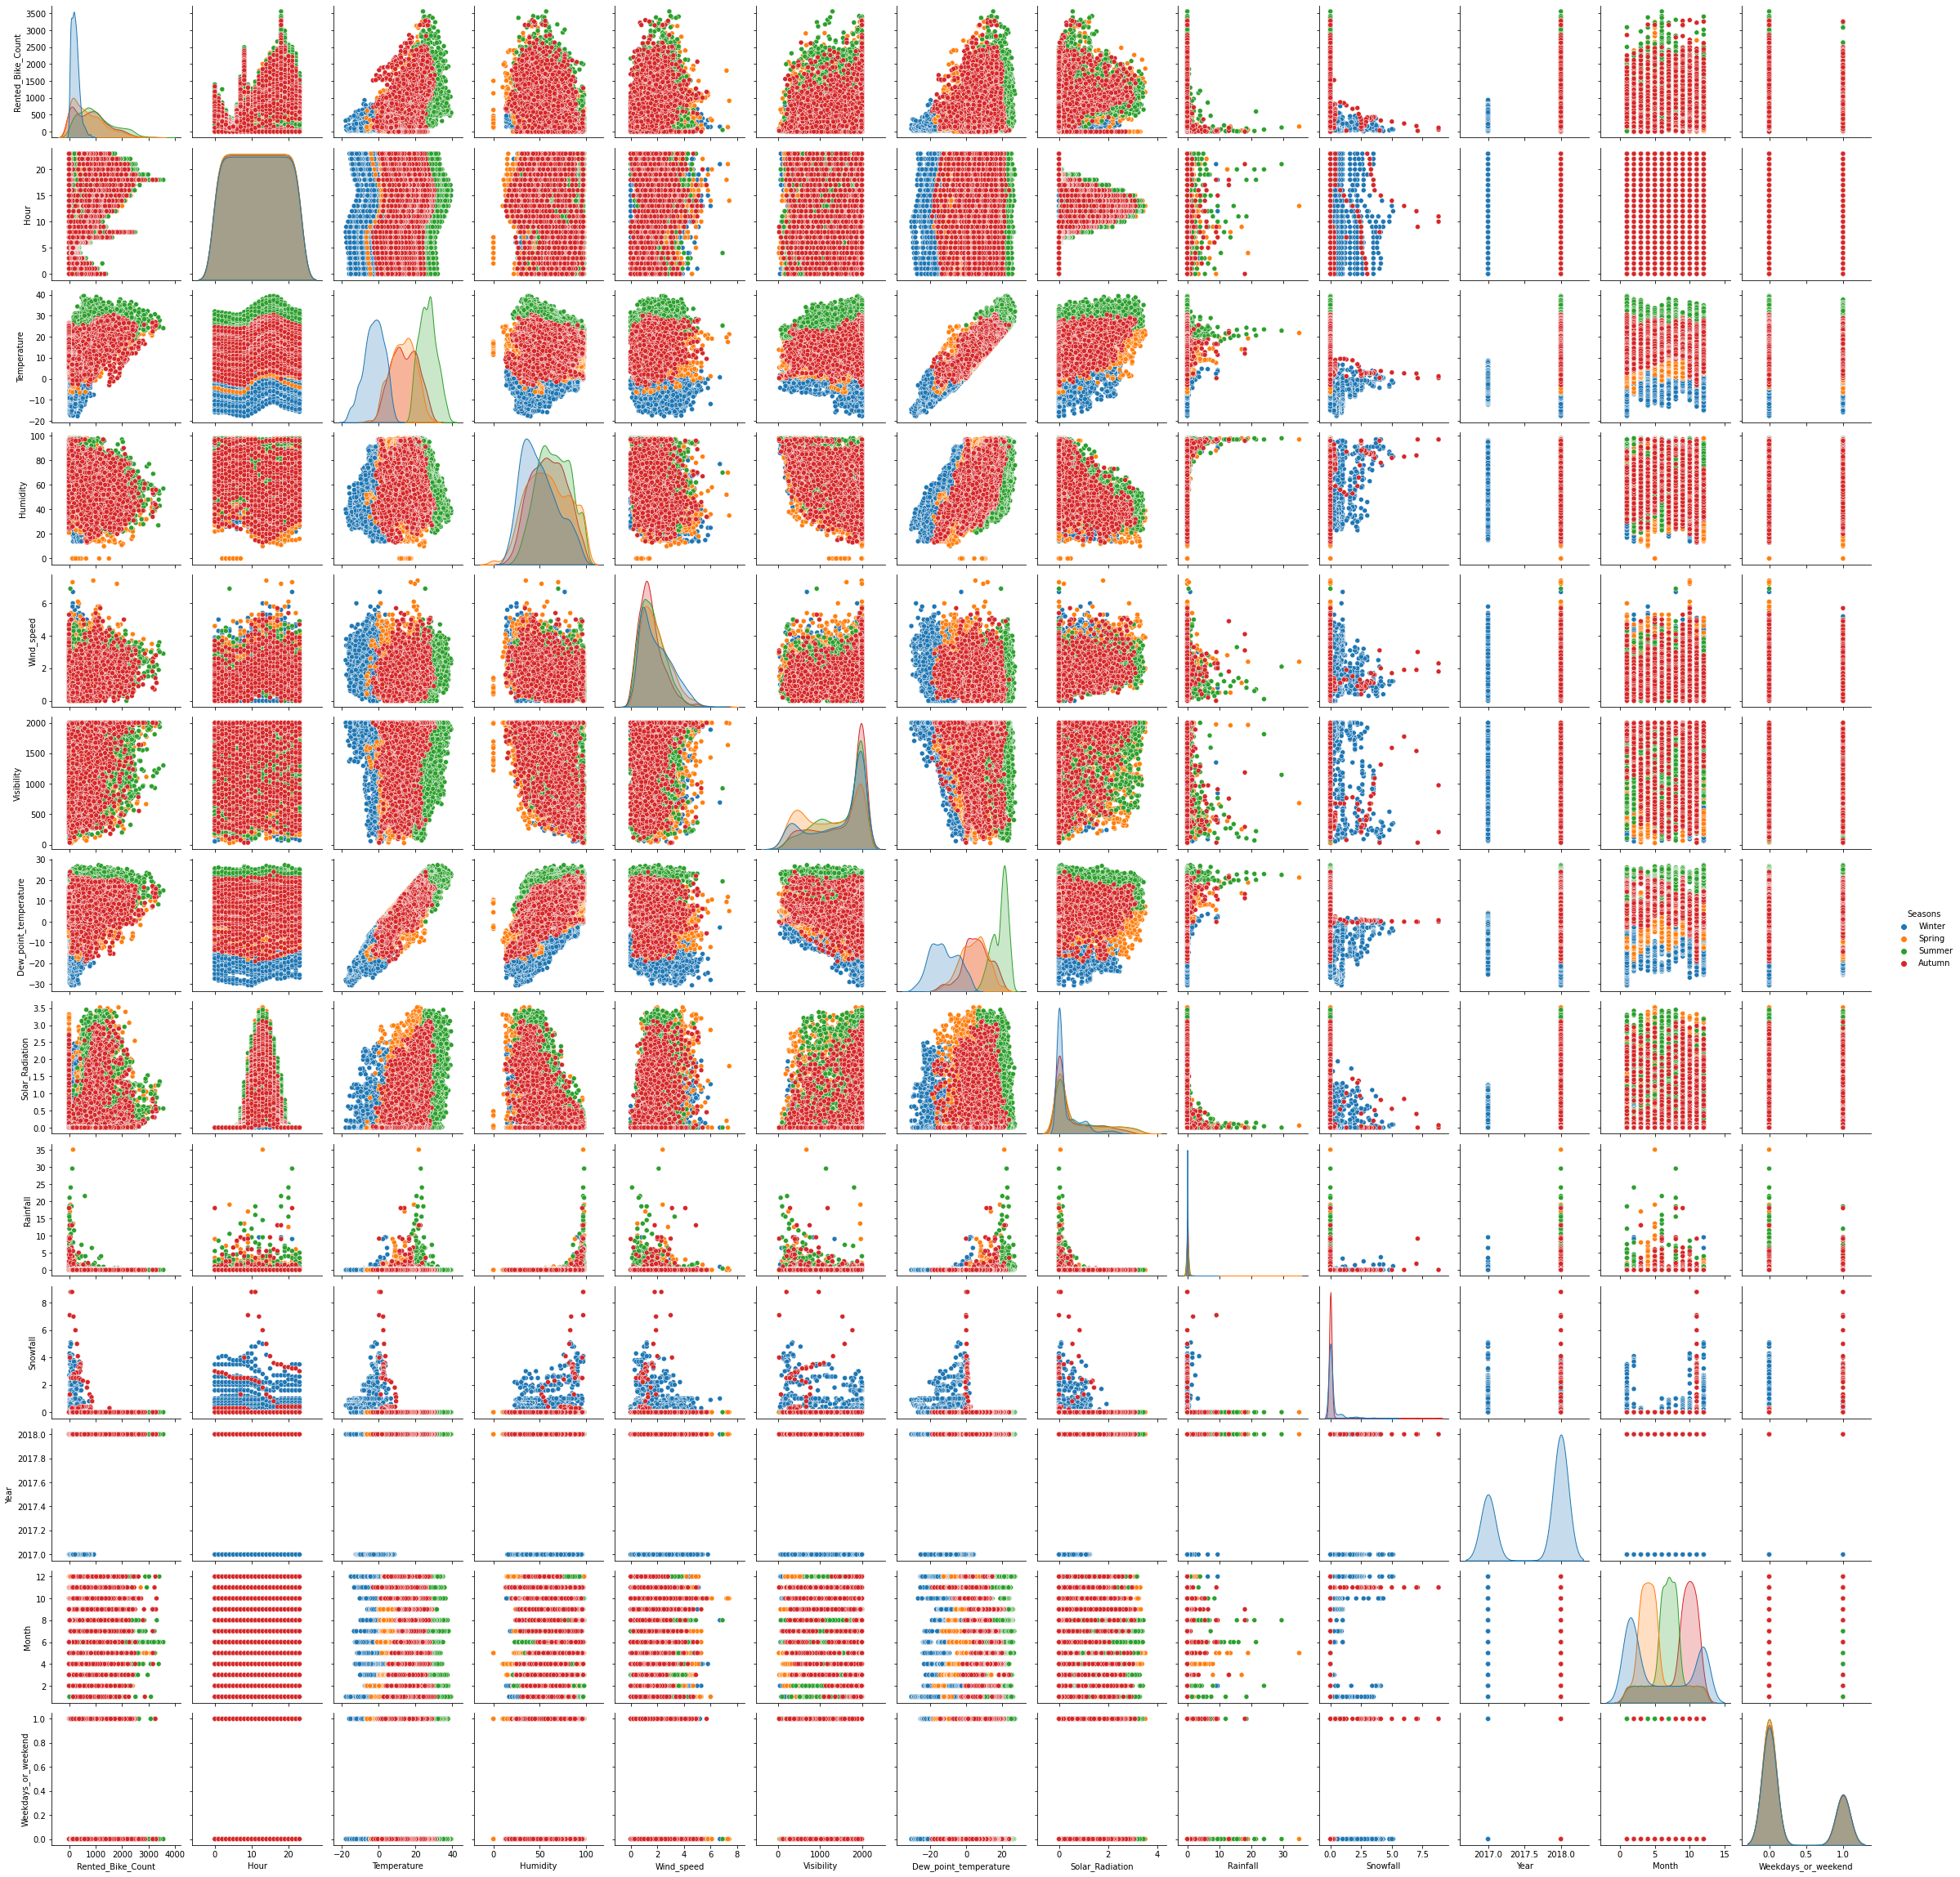

In [ ]:
sns.pairplot(bike_df,hue='Seasons')
#printing the regression plot for all the numerical features

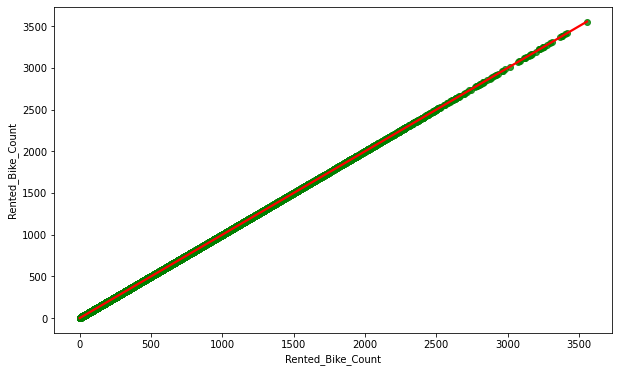

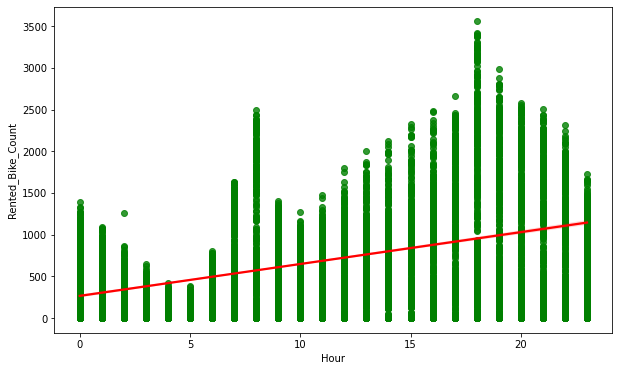

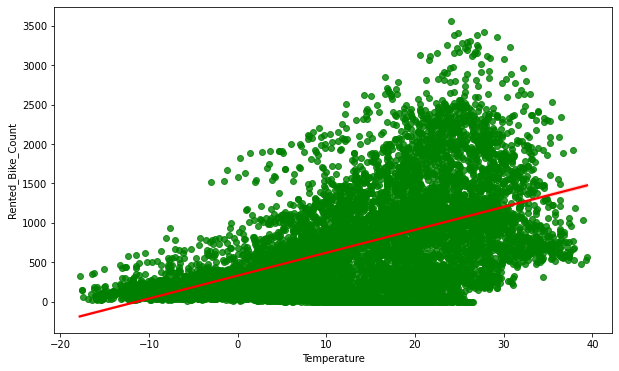

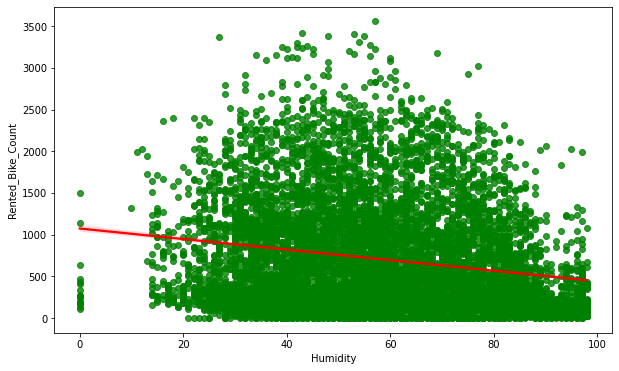

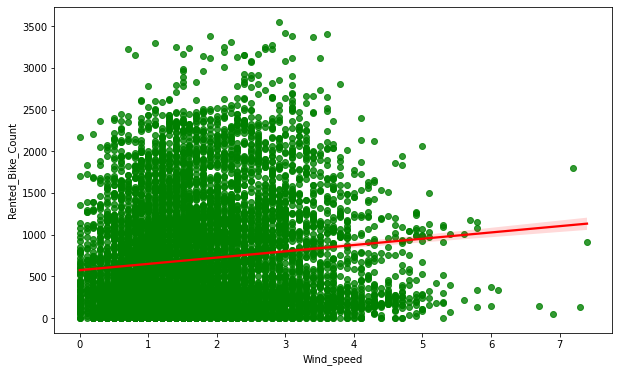

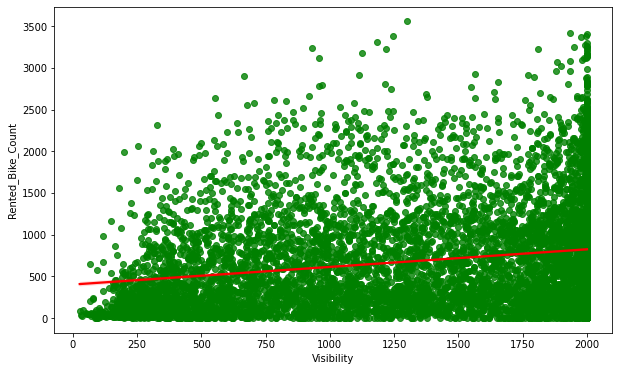

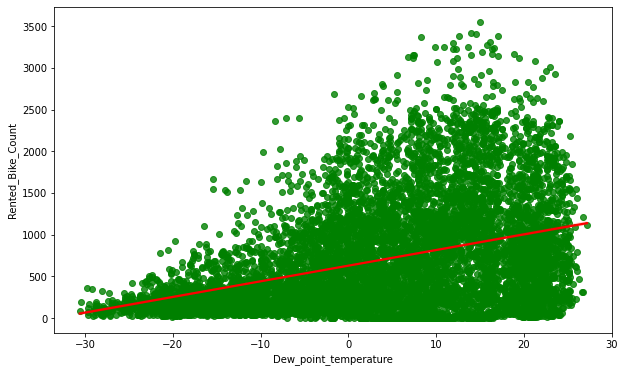

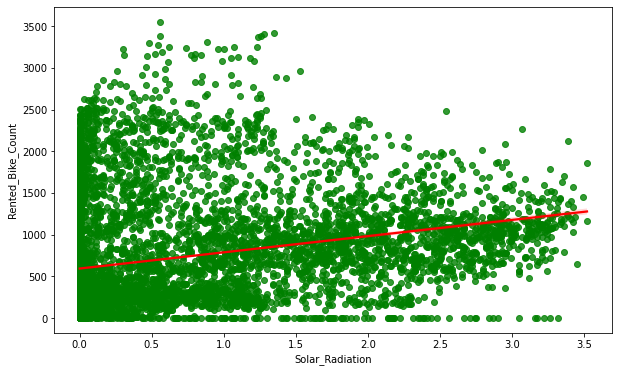

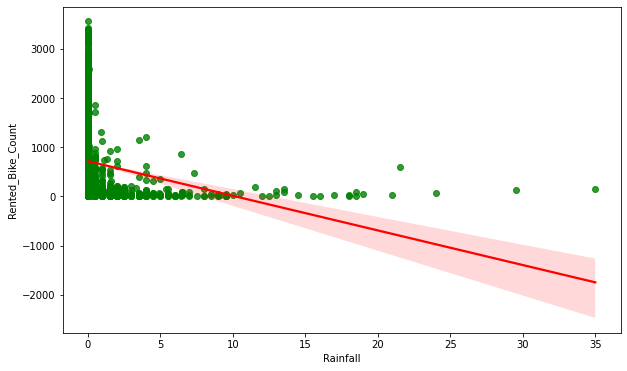

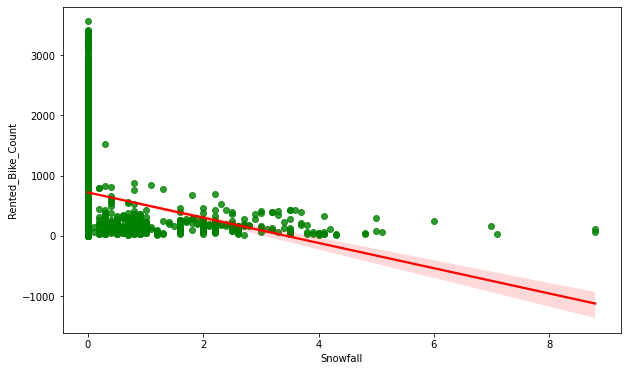

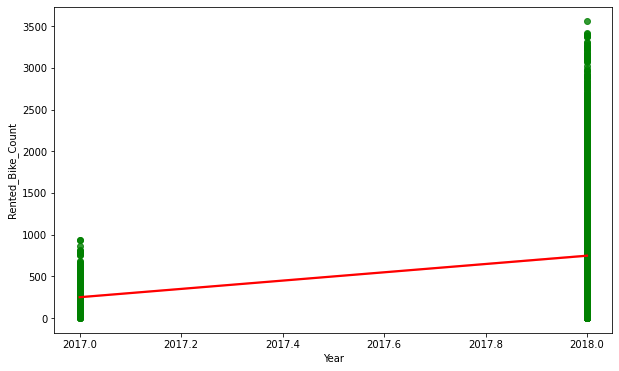

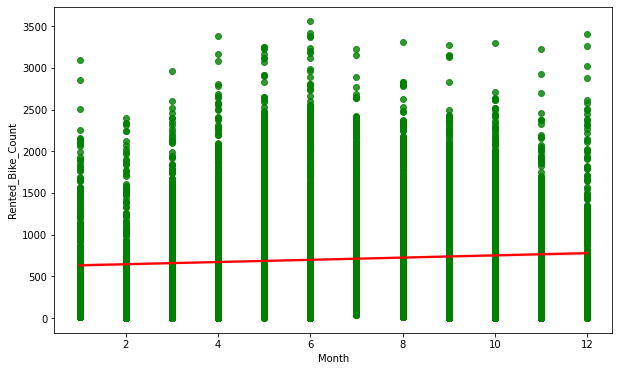

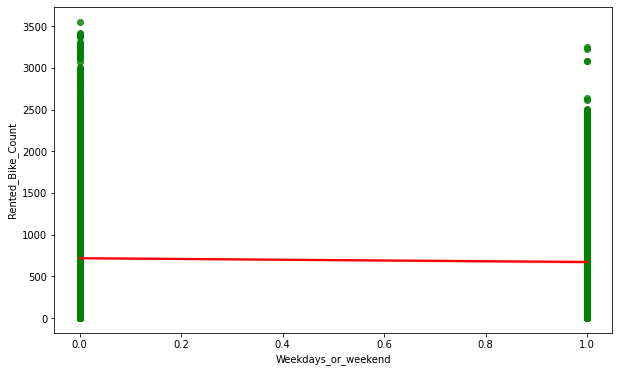

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'green'}, line_kws={"color": "red"})

*   ### **These are the Regression plot which show the liner relation between numeiric and target variable.**

*   ### **There are two type of liner relation present between independent and target variable.**

*   ### **Positively relation**
*   ### **Negatively relation**

## Positively relation
* **which means the target variable(rented bike count) increases with increase of numeric parameter.**
* **In the regression plot of numerical features like 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' columns are positively related with the target variaable.**

## Negatively relation
* **which means the target variable(rented bike count) decreases with increase of numeric parameter.**

* **In the regression plot of numerical features like 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable.**

# **Normalize Rented_Bike_Count column data**


##1.  The process of transforming the columns in a dataset to the same scale is referred to as normalization.
##2. This improves the performance and training stability of the model.
##3. The data normalization (also referred to as data pre-processing) is a basic element of data mining.
##4. It means transforming the data, namely converting the source data into another format that allows processing data effectively. 
##5. The main purpose of data normalization is to minimize or even exclude duplicated data

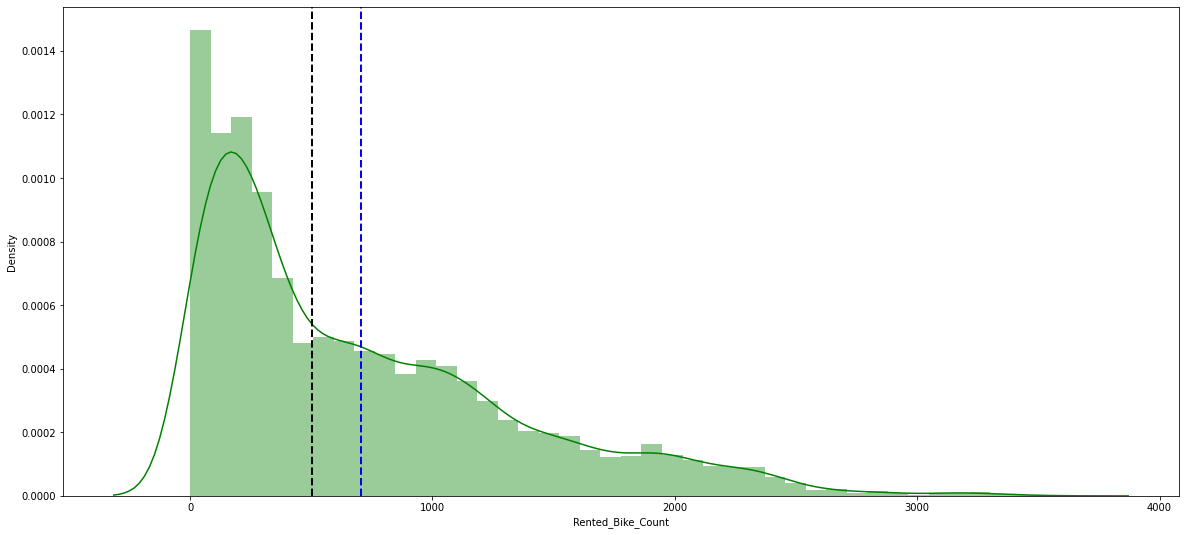

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(20,9))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
al=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="g")
al.axvline(bike_df['Rented_Bike_Count'].mean(), color='blue', linestyle='dashed', linewidth=2.0)
al.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2.0)
plt.show()


*   The above graph showt that rented bike has moderate right skewness.
* As per the linear regression the distribution of target variable/dependent variable has to be normal.
* we have to perform some operation to make it normal. 

## **Check the outlier by ploting Boxplot**

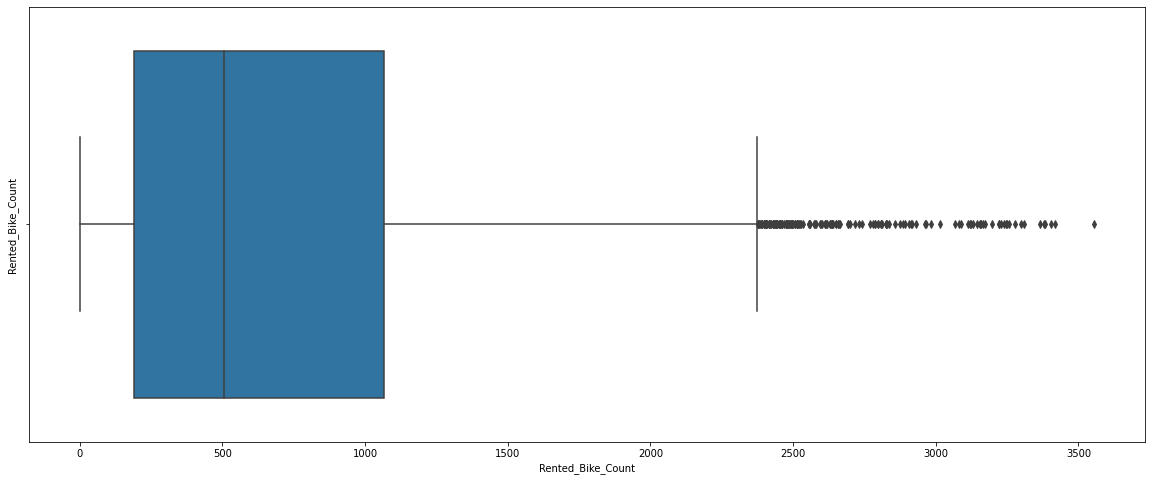

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(20,8))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

* ###    The above boxplot show that outliers in rented bike count column

### After apply square root to rented bike count to improve skewness.

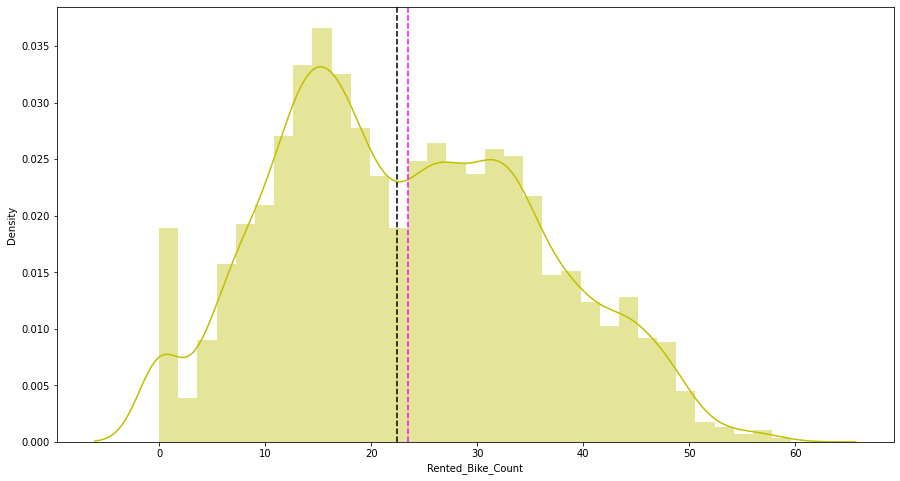

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(15,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
al=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']),color="y")
al.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=1.5)
al.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=1.5)
plt.show()


*   **By applying Square root for the skewed variable in order to make it normal.After applying Squrae root to the skewed rented bike count, here we get nearly similarly to normal distribution.**

# **Check the outlier by ploting Boxplot after Square root transformation**

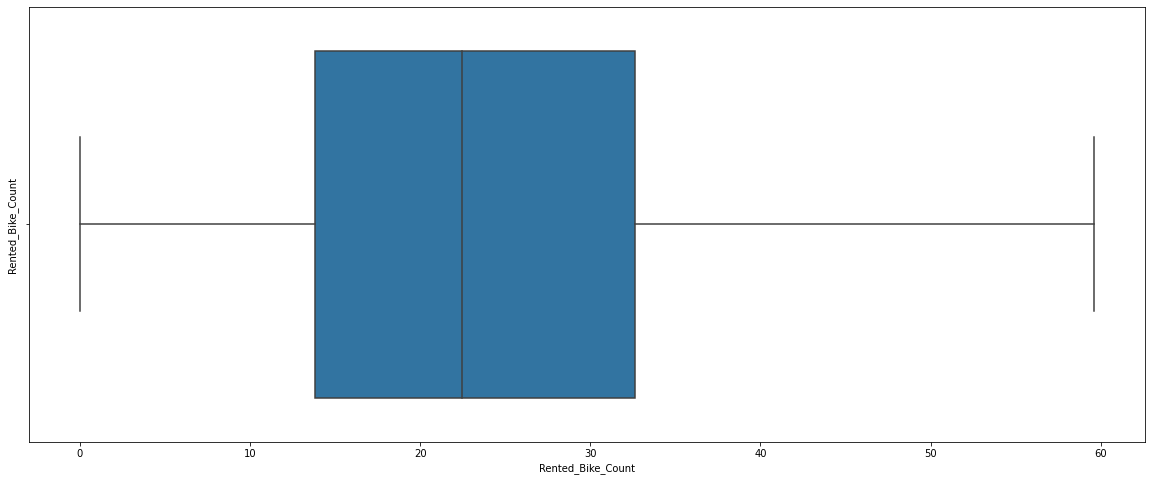

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(20,8))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

### We can clearly see that mostly no outliers in rented bike count column after Square root transformation.
###After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# **Correlation of all columns**

In [ ]:
bike_df.corr()

Rented_Bike_Count          Hour  Temperature  Humidity  \
Rented_Bike_Count               1.000000  4.102573e-01     0.538558 -0.199780   
Hour                            0.410257  1.000000e+00     0.124114 -0.241644   
Temperature                     0.538558  1.241145e-01     1.000000  0.159371   
Humidity                       -0.199780 -2.416438e-01     0.159371  1.000000   
Wind_speed                      0.121108  2.851967e-01    -0.036252 -0.336683   
Visibility                      0.199280  9.875348e-02     0.034794 -0.543090   
Dew_point_temperature           0.379788  3.054372e-03     0.912798  0.536894   
Solar_Radiation                 0.261837  1.451309e-01     0.353505 -0.461919   
Rainfall                       -0.123074  8.714642e-03     0.050282  0.236397   
Snowfall                       -0.141804 -2.151645e-02    -0.218405  0.108183   
Year                            0.215162  2.336763e-14     0.377796  0.035925   
Month                           0.070861  1.036729e-15     0.049683  0.047798   
Weekdays_or_weekend            -0.032259 -2.300554e-17    -0.012972 -0.036750   

                       Wind_speed  Visibility  Dew_point_temperature  \
Rented_Bike_Count        0.121108    0.199280               0.379788   
Hour                     0.285197    0.098753               0.003054   
Temperature             -0.036252    0.034794               0.912798   
Humidity                -0.336683   -0.543090               0.536894   
Wind_speed               1.000000    0.171507              -0.176486   
Visibility               0.171507    1.000000              -0.176630   
Dew_point_temperature   -0.176486   -0.176630               1.000000   
Solar_Radiation          0.332274    0.149738               0.094381   
Rainfall                -0.019674   -0.167629               0.125597   
Snowfall                -0.003554   -0.121695              -0.150887   
Year                    -0.003781    0.052381               0.336350   
Month                   -0.082069    0.077888               0.065101   
Weekdays_or_weekend     -0.022391    0.030650              -0.028966   

                       Solar_Radiation  Rainfall  Snowfall          Year  \
Rented_Bike_Count             0.261837 -0.123074 -0.141804  2.151618e-01   
Hour                          0.145131  0.008715 -0.021516  2.336763e-14   
Temperature                   0.353505  0.050282 -0.218405  3.777958e-01   
Humidity                     -0.461919  0.236397  0.108183  3.592468e-02   
Wind_speed                    0.332274 -0.019674 -0.003554 -3.780878e-03   
Visibility                    0.149738 -0.167629 -0.121695  5.238110e-02   
Dew_point_temperature         0.094381  0.125597 -0.150887  3.363497e-01   
Solar_Radiation               1.000000 -0.074290 -0.072301  1.280860e-01   
Rainfall                     -0.074290  1.000000  0.008500  2.752192e-02   
Snowfall                     -0.072301  0.008500  1.000000 -2.064178e-01   
Year                          0.128086  0.027522 -0.206418  1.000000e+00   
Month                        -0.030412 -0.022794  0.054758 -2.955612e-01   
Weekdays_or_weekend           0.008271 -0.014280 -0.022557 -2.158959e-02   

                              Month  Weekdays_or_weekend  
Rented_Bike_Count      7.086107e-02        -3.225936e-02  
Hour                   1.036729e-15        -2.300554e-17  
Temperature            4.968327e-02        -1.297241e-02  
Humidity               4.779778e-02        -3.674982e-02  
Wind_speed            -8.206909e-02        -2.239107e-02  
Visibility             7.788783e-02         3.064954e-02  
Dew_point_temperature  6.510073e-02        -2.896569e-02  
Solar_Radiation       -3.041240e-02         8.271095e-03  
Rainfall              -2.279368e-02        -1.427960e-02  
Snowfall               5.475846e-02        -2.255705e-02  
Year                  -2.955612e-01        -2.158959e-02  
Month                  1.000000e+00         9.174254e-03  
Weekdays_or_weekend    9.174254e-03         1.0

# **Checking of Correlation between variables**

# **Checking in OLS Model**

# Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable.

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  Year  Month  Weekdays_or_weekend  
0  No Holiday             Yes  2017      1                    0  
1  No Holiday             Yes  2017      1                    0  
2  No Holiday             Yes  2017      1                    0  
3  No Holiday             Yes  2017      1                    0  
4  No Holiday             Yes  2017      1                    0

In [ ]:
#add a constant column
X = sm.add_constant(X)
X

const  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0         -5.2        37         2.2        2000   
1       1.0         -5.5        38         0.8        2000   
2       1.0         -6.0        39         1.0        2000   
3       1.0         -6.2        40         0.9        2000   
4       1.0         -6.0        36         2.3        2000   
...     ...          ...       ...         ...         ...   
8755    1.0          4.2        34         2.6        1894   
8756    1.0          3.4        37         2.3        2000   
8757    1.0          2.6        39         0.3        1968   
8758    1.0          2.1        41         1.0        1859   
8759    1.0          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

In [ ]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:32:19   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model.

2. For F statistic , P value is less than 0.05 for 5% levelof significance.

3. P value of dew point temp and visibility are very high and they are not significant.

4. Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

5. The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

6. Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.

In [ ]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.036252    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.336683   -0.543090   
Wind_speed               NaN    -0.036252 -0.336683    1.000000    0.171507   
Visibility               NaN     0.034794 -0.543090    0.171507    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.176486   -0.176630   
Solar_Radiation          NaN     0.353505 -0.461919    0.332274    0.149738   
Rainfall                 NaN     0.050282  0.236397   -0.019674   -0.167629   
Snowfall                 NaN    -0.218405  0.108183   -0.003554   -0.121695   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.353505  0.050282   
Humidity                            0.536894        -0.461919  0.236397   
Wind_speed                         -0.176486         0.332274 -0.019674   
Visibility                         -0.176630         0.149738 -0.167629   
Dew_point_temperature               1.000000         0.094381  0.125597   
Solar_Radiation                     0.094381         1.000000 -0.074290   
Rainfall                            0.125597        -0.074290  1.000000   
Snowfall                           -0.150887        -0.072301  0.008500   

                       Snowfall  
const                       NaN  
Temperature           -0.218405  
Humidity               0.108183  
Wind_speed            -0.003554  
Visibility            -0.121695  
Dew_point_temperature -0.150887  
Solar_Radiation       -0.072301  
Rainfall               0.008500  
Snowfall               1.000000

* **Form the OLS model we can find that theh 'Temperature' and Dew_point_temperature' are highly correlated to each other.**
* **So we need to drop one of them. For droping a column we need to check the (P>|t|) value from the above table and we can see that 'Dew-point-temprature' value is higher so we need to drop that 'Dew-point-temprature' column.**
* **This can be seen on the heat-map next.**

# **Heatmap**

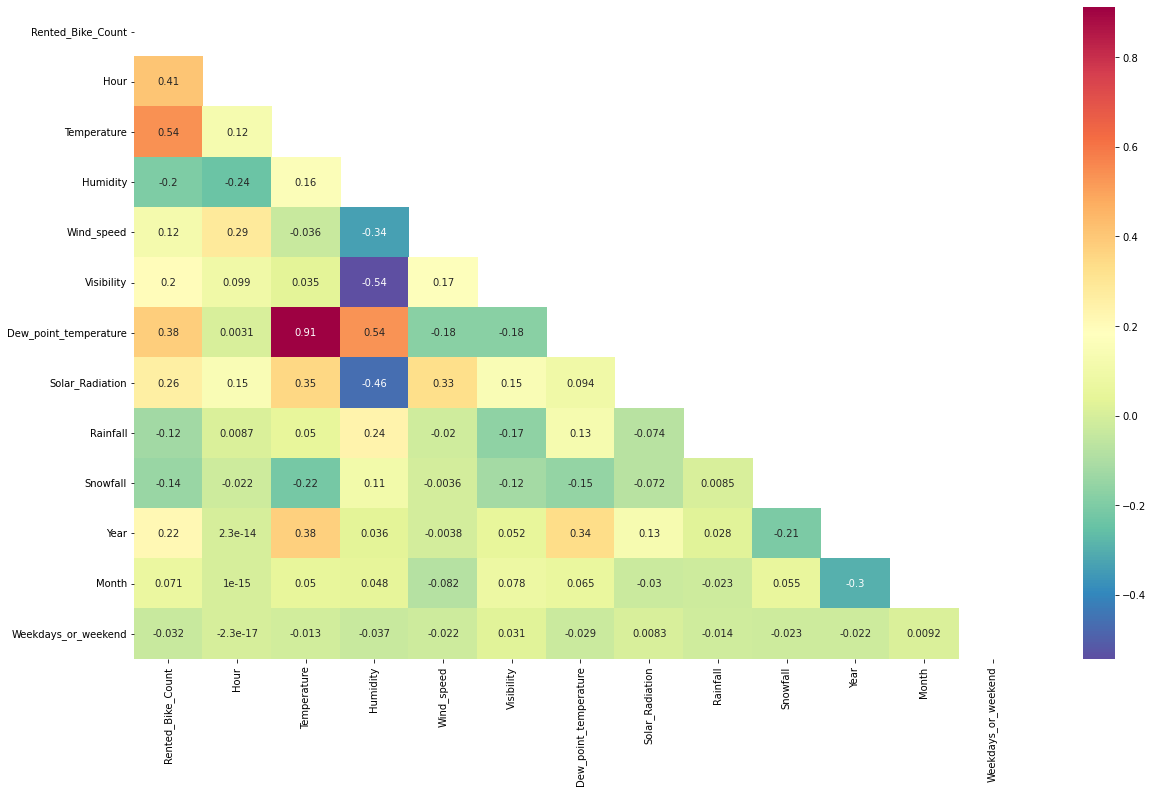

In [ ]:
# plot the Correlation matrix
plt.figure(figsize=(20,12))
correlation=bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='Spectral_r')

### **We can observe on the heatmap that on the target variable line the most positivly correlated varibales to the rent are:**

* ###   Temperature
* ###   Dew point temperature
* ###   Solar radiation

###  **And most negatively correlated variables are:**
* ###  Humidity
* ###  Rainfall



* ## From the above graph we can see that relation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so we if we drop this column than it will not affect  the outcome of our anallysis.
* ## We can drop the column 'Dew point temperature'.

In [ ]:
# drop  the column 'Dew point temperature' from dataset

bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)
bike_df=bike_df.drop(['Year'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Year                   8760 non-null   int64  
 14  Month                  8760 non-null   int64  
 15  Week

# **Create the dummy variables**

## A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [ ]:
#Assign catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

# **The categories must be converted into numbers.**

In [ ]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()  

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  Year  Month  \
0                  -17.6              0.0       0.0       0.0  2017      1   
1                  -17.6              0.0       0.0       0.0  2017      1   
2                  -17.7              0.0       0.0       0.0  2017      1   
3                  -17.6              0.0       0.0       0.0  2017      1   
4                  -18.6              0.0       0.0       0.0  2017      1   

   Weekdays_or_weekend  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0                    0               0               0               1   
1                    0               0               0               1   
2                    0               0               0               1   
3                    0               0               0               1   
4                    0               0               0               1   

   Holiday_No Holiday  Functioning_Day_Yes  
0                   1                    1  
1                   1                    1  
2                   1                    1  
3                   1                    1  
4                   1                    1

# **Model Training**

Train Test split for regression

##**What is Train Test split?**
##The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications.Before fitting any model it a general rule that we have to split the dataset into a training and testing set. This dataset split in a proportions of the data go into the training model and some propotion will go gor evaluation how our model perform on any unseen data.


##Generally the proportion may vary from 70:30,80:20,75:25 depending on the person.Mostyly we perfer 80:20 ratio for the training and testing respectivly.

In [ ]:
#Assign the value in X for independednt variable and Y dependent variable
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
X.head()

Hour  Temperature  Humidity  Wind_speed  Visibility  Dew_point_temperature  \
0     0         -5.2        37         2.2        2000                  -17.6   
1     1         -5.5        38         0.8        2000                  -17.6   
2     2         -6.0        39         1.0        2000                  -17.7   
3     3         -6.2        40         0.9        2000                  -17.6   
4     4         -6.0        36         2.3        2000                  -18.6   

   Solar_Radiation  Rainfall  Snowfall  Year  Month  Weekdays_or_weekend  \
0              0.0       0.0       0.0  2017      1                    0   
1              0.0       0.0       0.0  2017      1                    0   
2              0.0       0.0       0.0  2017      1                    0   
3              0.0       0.0       0.0  2017      1                    0   
4              0.0       0.0       0.0  2017      1                    0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning_Day_Yes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [ ]:
#Assign the value in Y fop dependent variable/target value
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print (X_train.shape)
print (X_test.shape)

(7008, 17)
(1752, 17)


In [ ]:

bike_df_copy.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall         Year        Month  Weekdays_or_weekend  \
count  8760.000000  8760.000000  8760.000000          8760.000000   
mean      0.075068  2017.915068     6.526027             0.290411   
std       0.436746     0.278796     3.448048             0.453978   
min       0.000000  2017.000000     1.000000             0.000000   
25%       0.000000  2018.000000     4.000000             0.000000   
50%       0.000000  2018.000000     7.000000             0.000000   
75%       0.000000  2018.000000    10.000000             1.000000   
max       8.800000  2018.000000    12.000000             1.000000   

       Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
count     8760.000000     8760.000000     8760.000000         8760.000000   
mean         0.252055        0.252055        0.246575            0.950685   
std          0.434217        0.434217        0.431042            0.216537   
min          0.000000        0.000000        0.000000            0.000000   
25%          0.000000        0.000000        0.000000            1.000000   
50%          0.000000        0.000000        0.000000            1.000000   
75%          1.000000        1.000000        0.000000            1.000000   
max          1.000000        1.000000        1.000000            1.000000   

       Functioning_Day_Yes  
count          8760.000000  
mean              0.966324  
std               0.180404  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

In [ ]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year', 'Month', 'Weekdays_or_weekend', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes'],
      dtype='object')

# **LINEAR REGRESSION**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
#import the packages and do LinearRegression
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#Checking the score
reg.score(X_train, y_train)

0.6566702426180293

In [ ]:
#check the coefficeint
reg.coef_

array([ 4.91746395e-01,  1.97122755e-02, -2.84311874e-01,  1.42588350e-01,
        1.47107079e-04,  4.84660292e-01, -6.50046377e-01, -1.42470617e+00,
        7.61331846e-02, -2.38507080e+00, -9.51985450e-03, -7.14027689e-01,
       -2.87808365e+00, -2.93336458e+00, -8.87920047e+00,  2.98323862e+00,
        2.84271097e+01])

## Training dataset summary

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.98715355670106
RMSE : 7.2792275384618295
MAE : 5.5688420275877135
R2 : 0.6566702426180293
Adjusted R2 : 0.6533042646044807


Looks like our R2 score value is 0.65 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

# **Store the model in train data**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

# **Testing dataset summary**

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_test)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 54.15503807932429
RMSE : 7.35901067259209
MAE : 5.652187638863334
R2 : 0.6561284835266044
Adjusted R2 : 0.6527571941494141


# **Store the model in testing data**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),3)
       }
test_df=pd.DataFrame(dict2,index=[1])

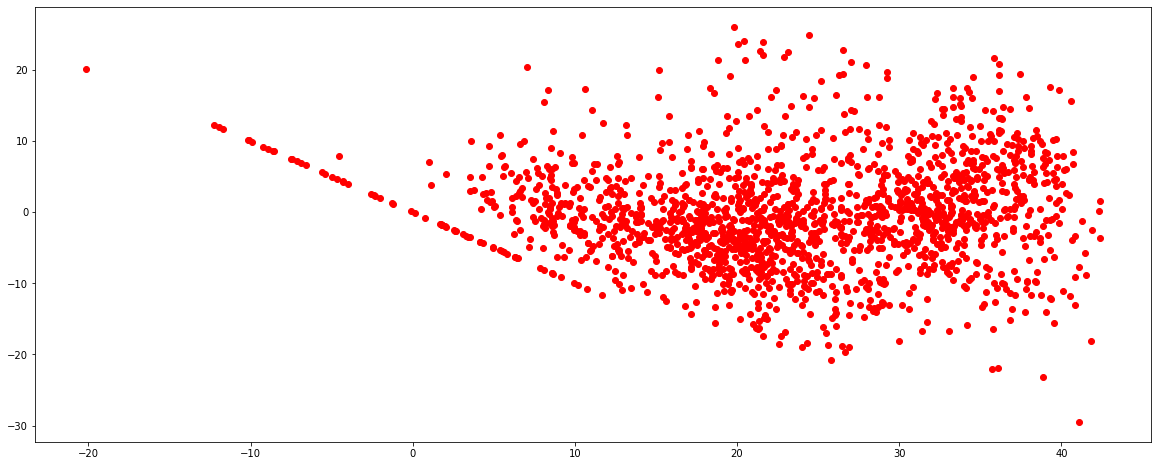

In [ ]:
#Heteroscadacity
plt.figure(figsize=(20,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),color='red')

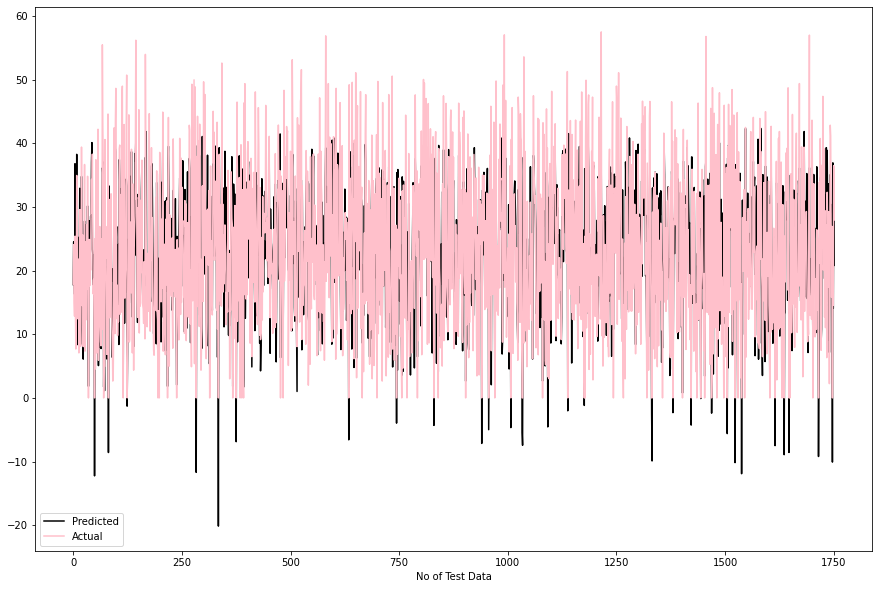

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test,color='black')
plt.plot(np.array(y_test),color='pink')
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION**

 
*   ## **Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage.**
*  ## **Shrinkage is where data values are shrunk towards a central point as the mean.** 
*  ## **Lasso regression technique also called as '*L1 regularization technique*'.**


In [ ]:
##import the packages and do Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=4000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.4484219665559509 0.4774433685067645


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=reg.predict(X_train)
print(y_pred_train_lasso)
y_pred_test_lasso=reg.predict(X_test)
print(y_pred_test_lasso)

[18.10655075 36.62382385 33.62023074 ... 30.18324458 18.52194229
 22.51816575]
[17.80815145 24.53096784 20.15542416 ... 14.06965484 32.96198293
 20.82847187]


# **Training dataset summary for lasso**

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.98715355670106
RMSE : 7.2792275384618295
MAE : 5.5688420275877135
R2 : 0.6566702426180293
Adjusted R2 : 0.6533042646044807


Looks like our R2 score value is 0.65 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),3)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.15503807932429
RMSE : 7.35901067259209
MAE : 5.652187638863334
R2 : 0.6561284835266044
Adjusted R2 : 0.6527571941494141


Looks like our R2 score value is 0.65 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

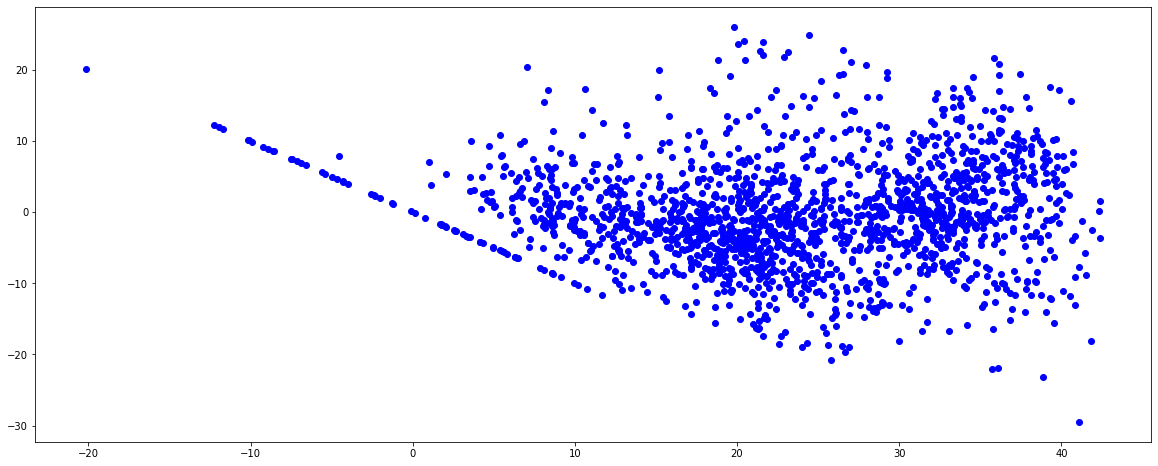

In [ ]:
#Heteroscadacity
plt.figure(figsize=(20,8))
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso),color='blue')

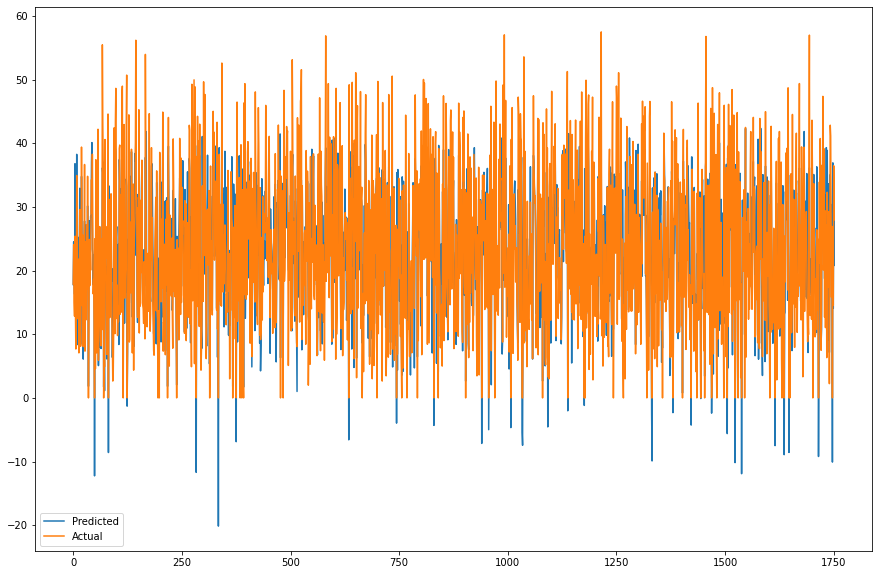

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.6566701972858067

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
print(y_pred_train_ridge)
y_pred_test_ridge=ridge.predict(X_test)
print(y_pred_test_ridge)

[18.10776291 36.62420843 33.6207275  ... 30.18304079 18.52140286
 22.5172433 ]
[17.80808662 24.52896328 20.15483376 ... 14.06958771 32.95985825
 20.82618038]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.98716055296455
RMSE : 7.279228019025407
MAE : 5.568867766574528
R2 : 0.6566701972858067
Adjusted R2 : 0.6533042188278244


Value of R2 os os 0.65 that means it capture the data variance.

In [ ]:
# storing the test set metrics value in a dataframe for comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.15553815282732
RMSE : 7.359044649465535
MAE : 5.6522810783829645
R2 : 0.6561253081796756
Adjusted R2 : 0.6527539876716333


Value of R2 os os 0.65 that means it capture the data variance.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

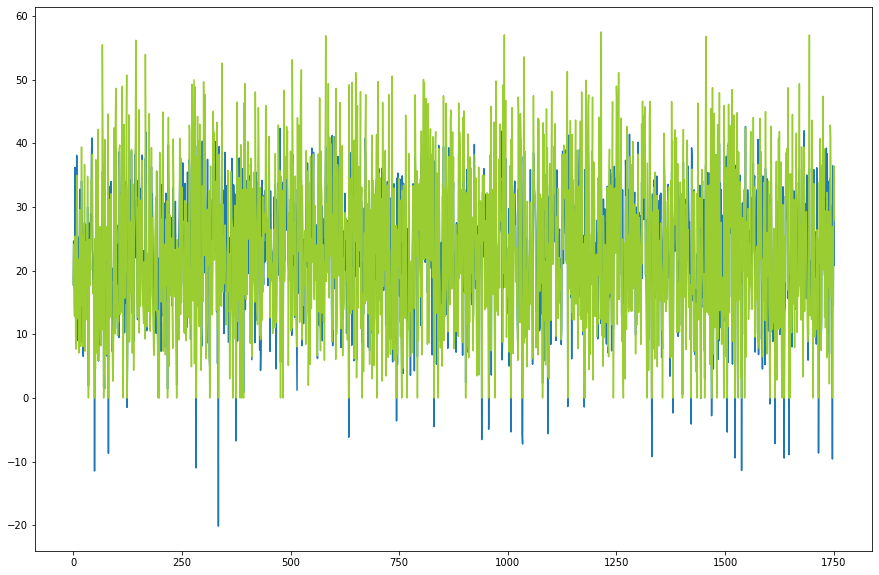

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)),color='yellowgreen')
plt.show()

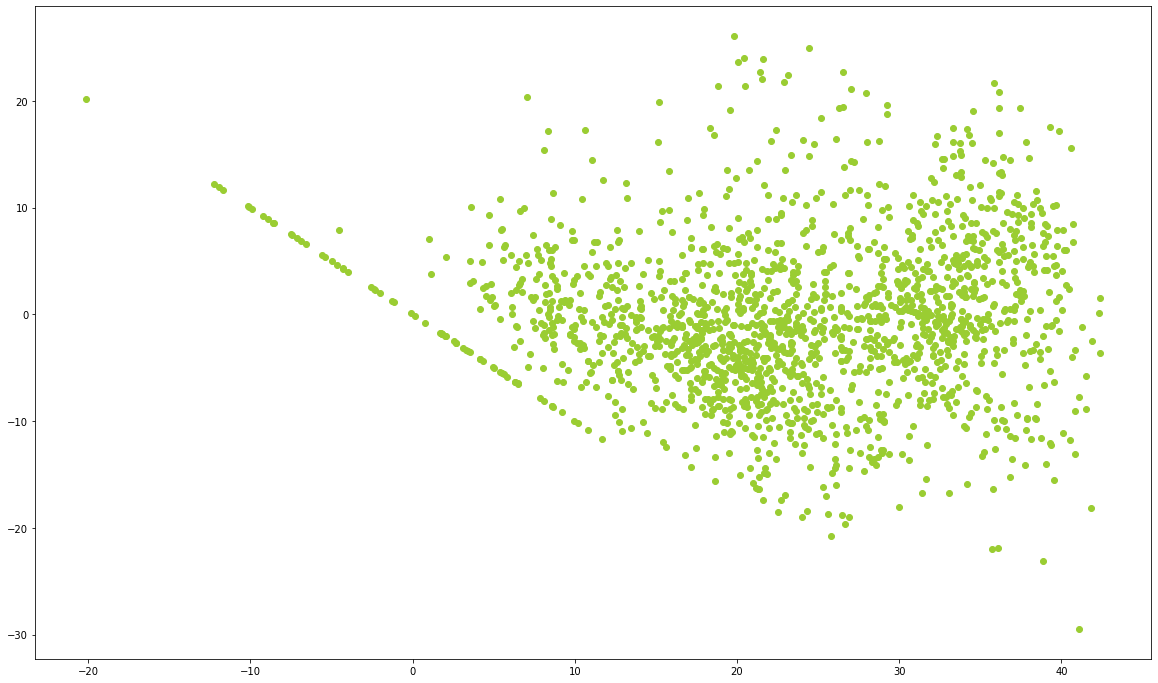

In [ ]:
# Heteroscadacity
plt.figure(figsize=(20,12))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),color='yellowgreen')

# **ELASTIC NET REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.5834043206308951

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 64.29451208107879
RMSE : 8.018385877536625
MAE : 6.0926390605127025
R2 : 0.5834043206308951
Adjusted R2 : 0.5793200492645314


Looks like our R2 score value is 0.58 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),3)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 67.91452871048334
RMSE : 8.24102716355694
MAE : 6.2774700651873765
R2 : 0.5687590147376134
Adjusted R2 : 0.5645311619409233


Looks like our R2 score value is 0.57 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),3)}
test_df=test_df.append(dict2,ignore_index=True)

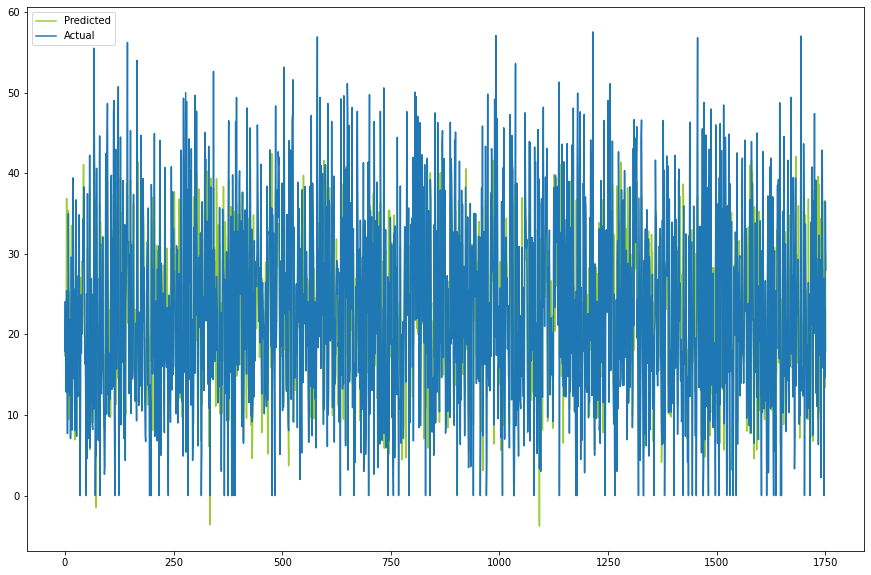

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en),color='yellowgreen')
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

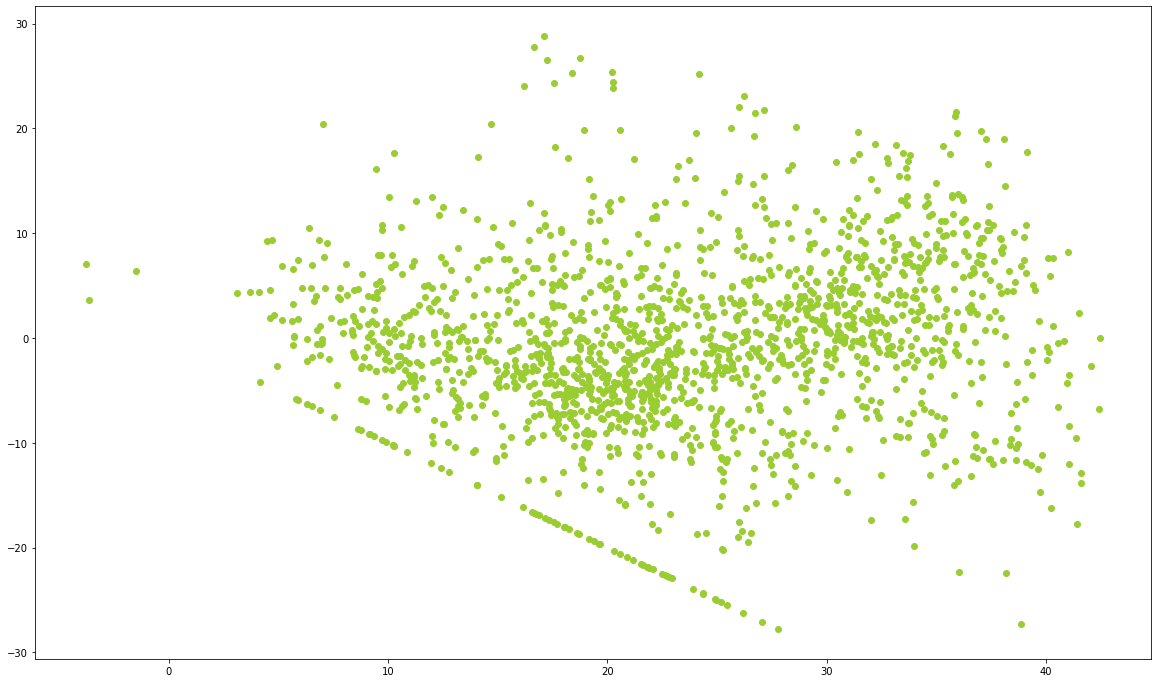

In [ ]:
# Heteroscadacity
plt.figure(figsize=(20,12))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),color='yellowgreen')

# **DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8318783076277656
MSE : 25.94674576963378
RMSE : 5.093794829950827
MAE : 3.5545568887680794
R2 : 0.8318783076277656
Adjusted R2 : 0.8302300557417633


Looks like our R2 score value is 0.83 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.35470890253302
RMSE : 5.688119979618311
MAE : 3.972700956412215
R2 : 0.7945553505276359
Adjusted R2 : 0.7925411872975148


The R2_score for the test set is 0.79. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

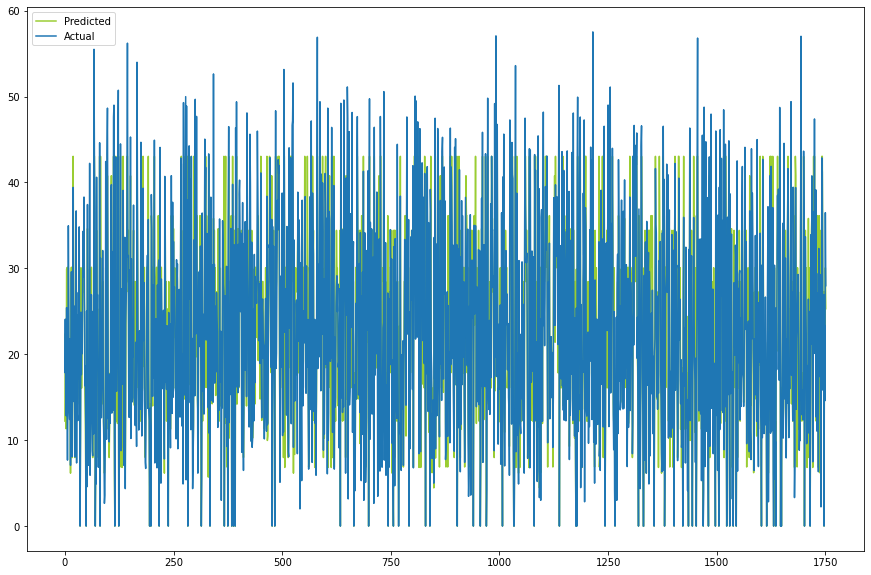

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)),color='yellowgreen')
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

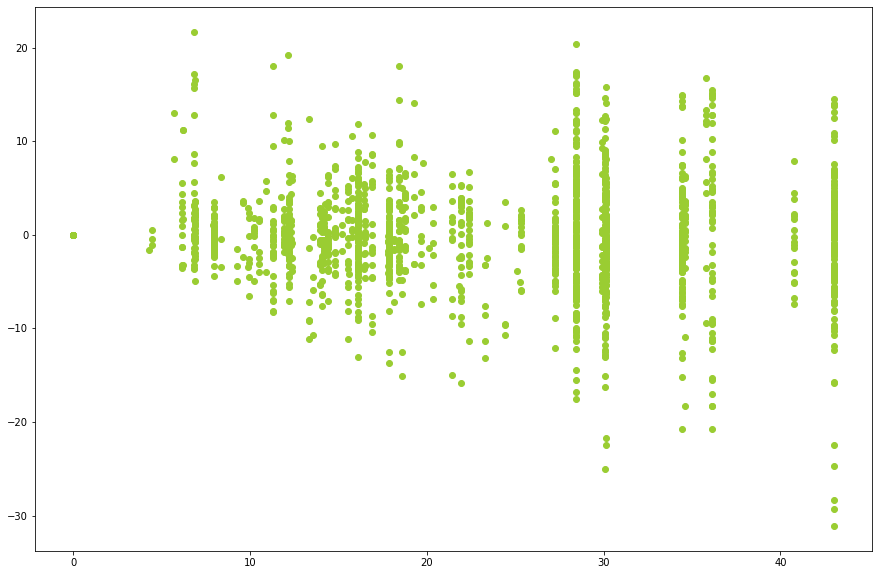

In [ ]:
# Heteroscadacity
plt.figure(figsize=(15,10))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),color='yellowgreen')

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9887201710487845
MSE : 1.7408512250408463
RMSE : 1.3194132123943758
MAE : 0.8515986122974984
R2 : 0.9887201710487845
Adjusted R2 : 0.9886095844904392


Look like our R2 score value is 0.99 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.586329973345695
RMSE : 3.5477218004440108
MAE : 2.335333977552613
R2 : 0.920079820303527
Adjusted R2 : 0.9192962891300321


Looks like R2_score for the test set is 0.91. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

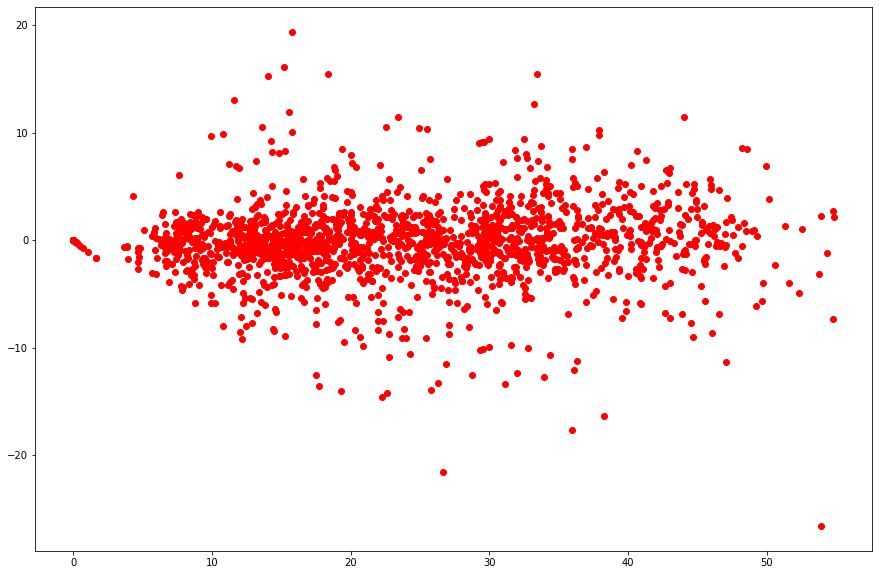

In [ ]:
# Heteroscadacity
plt.figure(figsize=(15,10))
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r),color='red')

# **Understanding the importance of the features**

In [ ]:
rf_model.feature_importances_

array([0.23838912, 0.27678716, 0.09459506, 0.01114634, 0.01309465,
       0.02137632, 0.03930629, 0.06373158, 0.00131781, 0.00095829,
       0.01242247, 0.01032119, 0.00779783, 0.00132854, 0.05538043,
       0.00304293, 0.149004  ])

In [ ]:
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1             Temperature                0.28
0                    Hour                0.24
16    Functioning_Day_Yes                0.15
2                Humidity                0.09
7                Rainfall                0.06
14         Seasons_Winter                0.06
6         Solar_Radiation                0.04
5   Dew_point_temperature                0.02
3              Wind_speed                0.01
4              Visibility                0.01
10                  Month                0.01
11    Weekdays_or_weekend                0.01
12         Seasons_Spring                0.01
9                    Year                0.00
13         Seasons_Summer                0.00
15     Holiday_No Holiday                0.00
8                Snowfall                0.00

In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

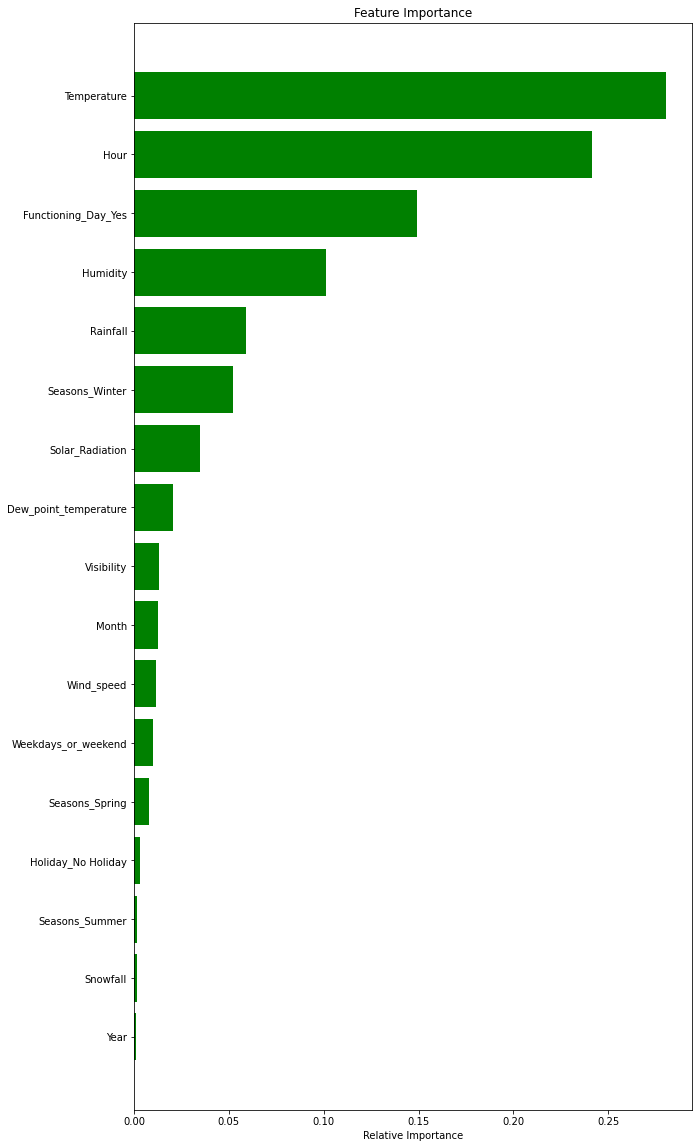

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show( )

# **GRADIENT BOOSTING**

In [162]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [163]:
# Making predictions on train and test data
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [164]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8906247080946529
MSE : 16.88023034091356
RMSE : 4.108555748789781
MAE : 2.9516149687601465
R2 : 0.8906247080946529
Adjusted R2 : 0.8895524013112671


Looks like our R2 score value is 0.89 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [165]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [166]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 19.34969054848829
RMSE : 4.398828315414036
MAE : 3.1317719226265672
R2 : 0.8771341011254881
Adjusted R2 : 0.8759295334894635


The R2_score for the test set is 0.88. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [167]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

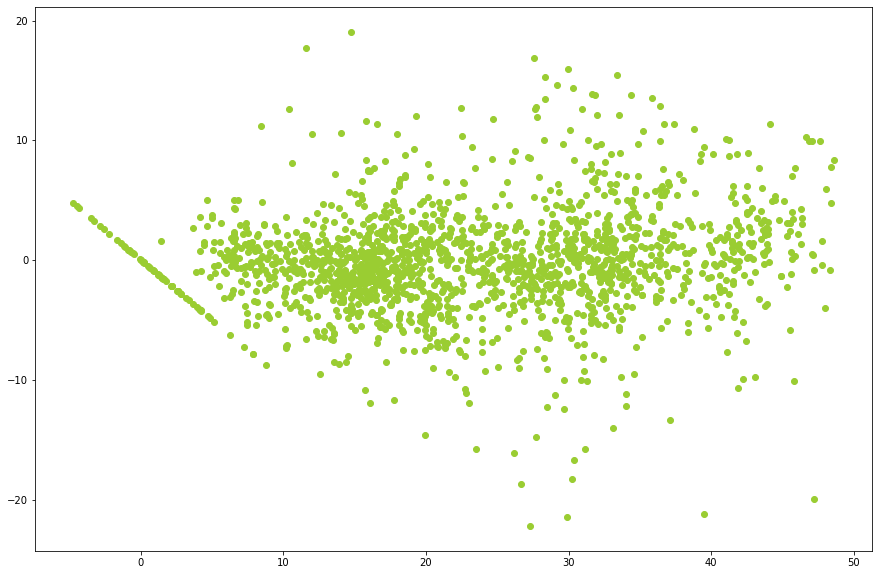

In [ ]:
### Heteroscadacity
plt.figure(figsize=(15,10))
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g),color='yellowgreen')

In [168]:
gb_model.feature_importances_

array([2.39476319e-01, 3.12255081e-01, 9.77488762e-02, 4.07702489e-04,
       2.10434886e-03, 1.04550299e-02, 3.61586324e-02, 6.16801386e-02,
       5.36397754e-04, 1.10177131e-03, 4.79172868e-03, 2.93115840e-03,
       2.47738172e-03, 2.59969136e-04, 5.33107511e-02, 2.12907491e-03,
       1.72175639e-01])

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

Feature  Feature Importance
0         Hour                0.24
1  Temperature                0.32
2     Humidity                0.10
3   Wind_speed                0.00
4   Visibility                0.00

In [169]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1             Temperature                0.28
0                    Hour                0.24
16    Functioning_Day_Yes                0.15
2                Humidity                0.09
7                Rainfall                0.06
14         Seasons_Winter                0.06
6         Solar_Radiation                0.04
5   Dew_point_temperature                0.02
3              Wind_speed                0.01
4              Visibility                0.01
10                  Month                0.01
11    Weekdays_or_weekend                0.01
12         Seasons_Spring                0.01
9                    Year                0.00
13         Seasons_Summer                0.00
15     Holiday_No Holiday                0.00
8                Snowfall                0.00

In [170]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [171]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

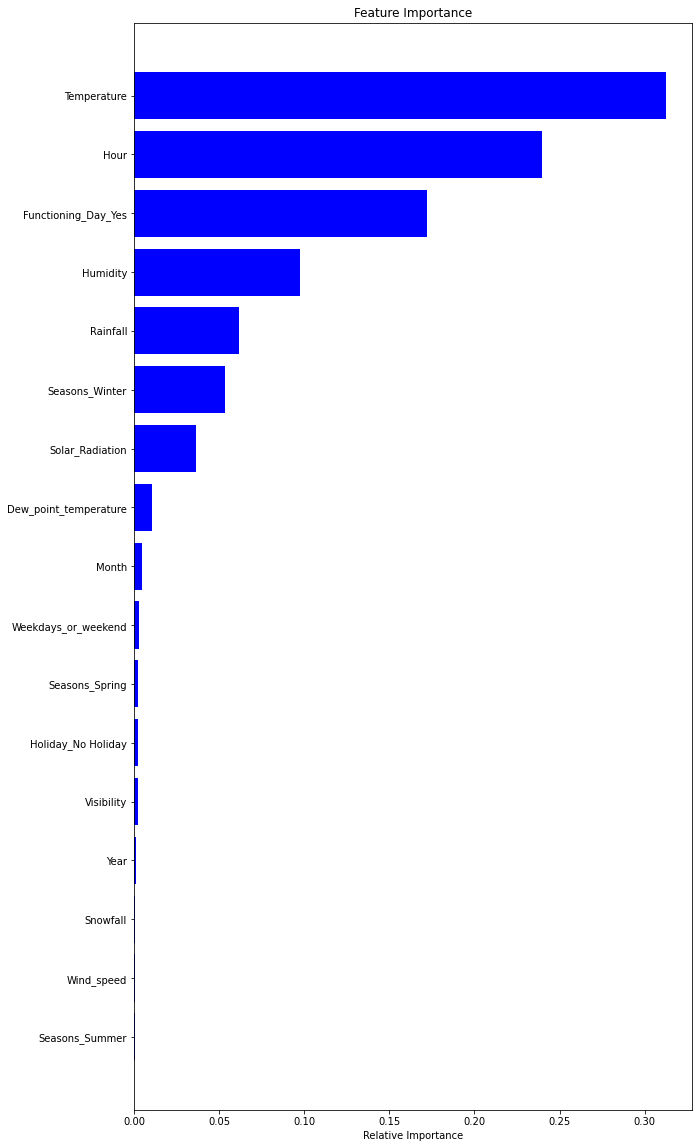

In [172]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Hyperparameter tuning**

## Hyperparameter tuning (or hyperparameter optimization) is the process of determining the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process. Each trial is a complete execution of your training application with values for your chosen hyperparameters, set within the limits you specify. This process once finished will give you the set of hyperparameter values that are best suited for the model to give optimal results.  

##1.   There are two type way to tuning hyperparameter
* ##   GridSearchCV
* ##   RandomizedSearchCV

**GridSearchCV**

* ## In GridSearchCV approach, the machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values.

# **RandomizedSearchCV**

RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in a random fashion to find the best set of hyperparameters. This approach reduces unnecessary computation.

# **Gradient Boosting Regressor with GridSearchCV**

In [173]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [175]:

from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [176]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [177]:
gb_optimal_model = gb_grid.best_estimator_

In [178]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [179]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [180]:

from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9560877024082052
MSE : 6.777122010240805
RMSE : 2.603290611944968
MAE : 1.7487400972558536
R2 : 0.9560877024082052
Adjusted R2 : 0.955657189686717


In [181]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [182]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.26168802923979
RMSE : 3.5016693203727547
MAE : 2.3409379430228046
R2 : 0.9221412188656893
Adjusted R2 : 0.9213778974820196


In [183]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

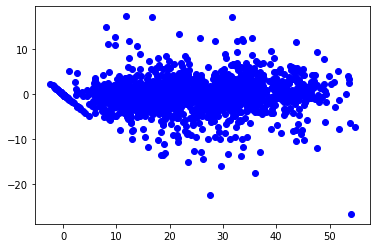

In [184]:
### Heteroscadacity
plt.Figure(figsize=(35,10))
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g),color='blue')

In [185]:
gb_optimal_model.feature_importances_

array([0.25022535, 0.27881527, 0.10738081, 0.00307511, 0.00686968,
       0.01625472, 0.03219585, 0.06151757, 0.0007944 , 0.00125436,
       0.00979116, 0.01166866, 0.00764125, 0.00127902, 0.06048991,
       0.00252074, 0.14822613])

In [186]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [187]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [188]:
importance_df.head()

Feature  Feature Importance
0         Hour                0.25
1  Temperature                0.28
2     Humidity                0.11
3   Wind_speed                0.00
4   Visibility                0.01

In [189]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1             Temperature                0.28
0                    Hour                0.25
16    Functioning_Day_Yes                0.15
2                Humidity                0.11
7                Rainfall                0.06
14         Seasons_Winter                0.06
6         Solar_Radiation                0.03
5   Dew_point_temperature                0.02
4              Visibility                0.01
10                  Month                0.01
11    Weekdays_or_weekend                0.01
12         Seasons_Spring                0.01
3              Wind_speed                0.00
9                    Year                0.00
13         Seasons_Summer                0.00
15     Holiday_No Holiday                0.00
8                Snowfall                0.00

In [190]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [191]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

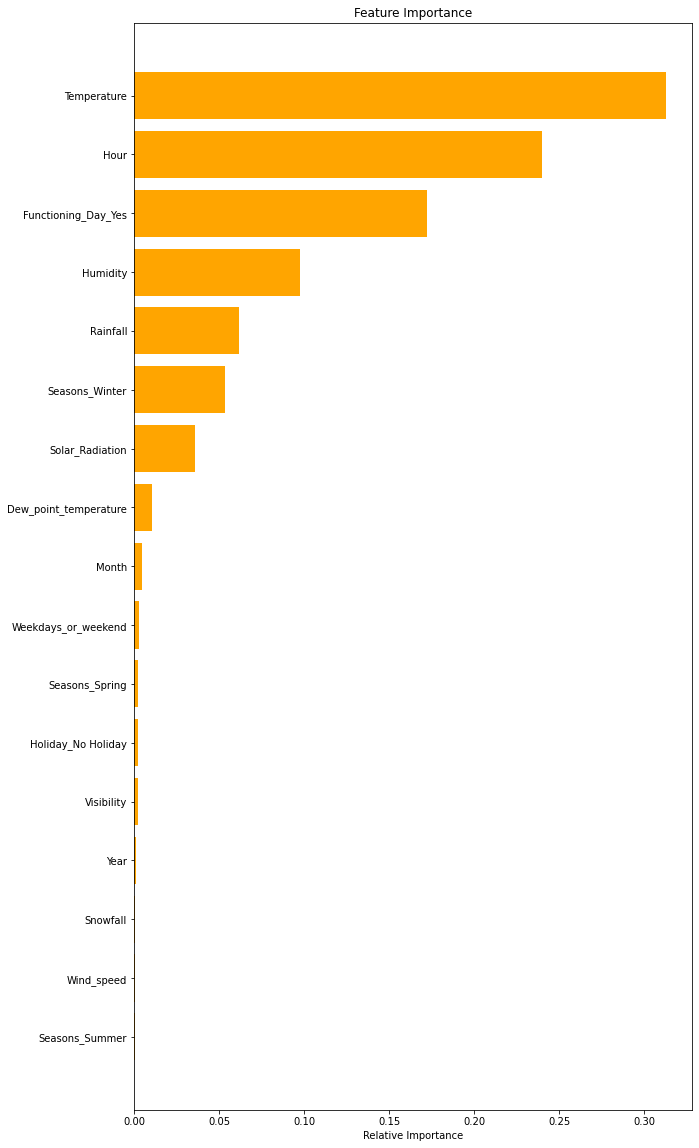

In [194]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **CONCLUSION**

In [195]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   5.569  52.987  7.279   
             1                Lasso regression   5.569  52.987  7.279   
             2                Lasso regression   5.569  52.987  7.279   
             3                Ridge regression   5.652  54.156  7.359   
             4          Elastic net regression   6.093  64.295  8.018   
             5        Dicision tree regression   3.521  23.668  4.865   
             6        Dicision tree regression   3.555  25.947  5.094   
             7        Random forest regression   0.852   1.741  1.319   
             8    Gradient boosting regression   2.952  16.880  4.109   
             9  Gradient Boosting gridsearchcv   1.749   6.777  2.603   
Test set     0               Linear regression   5.652  54.155  7.359   
             1                Lasso regression   5.652  54.155  7.359   
             2                Ridge regression   5.652  54.156  7.359   
             3      Elastic net regression Test  6.277  67.915  8.241   
             4        Random forest regression   2.335  12.586  3.548   
             5    Gradient boosting regression   3.132  19.350  4.399   
             6  Gradient Boosting gridsearchcv   2.341  12.262  3.502   

                R2_score  Adjusted R2  
Training set 0     0.657        0.650  
             1     0.657        0.653  
             2     0.657        0.653  
             3     0.656        0.650  
             4     0.583        0.579  
             5     0.847        0.850  
             6     0.832        0.830  
             7     0.989        0.990  
             8     0.891        0.890  
             9     0.956        0.960  
Test set     0     0.656        0.653  
             1     0.656        0.650  
             2     0.656        0.650  
             3     0.569        0.565  
             4     0.920        0.920  
             5     0.877        0.880  
             6     0.922        0.920

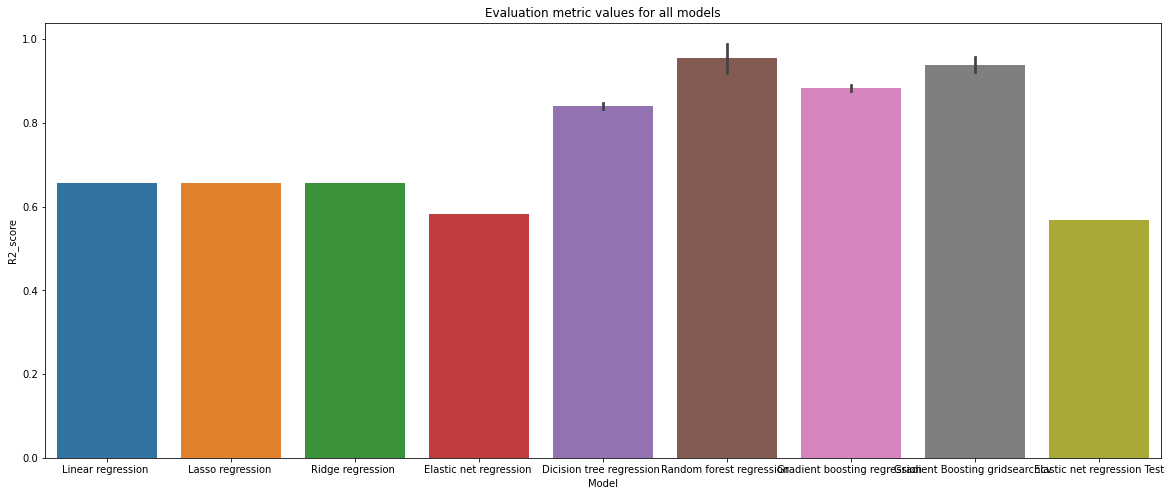

In [196]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Month barplot
sns.barplot(data = result,x = 'Model',y = 'R2_score')

# Show the plot
plt.title('Evaluation metric values for all models')
plt.show()

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 96% respectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model. ***bold text***